## Churn analysis and prediction 


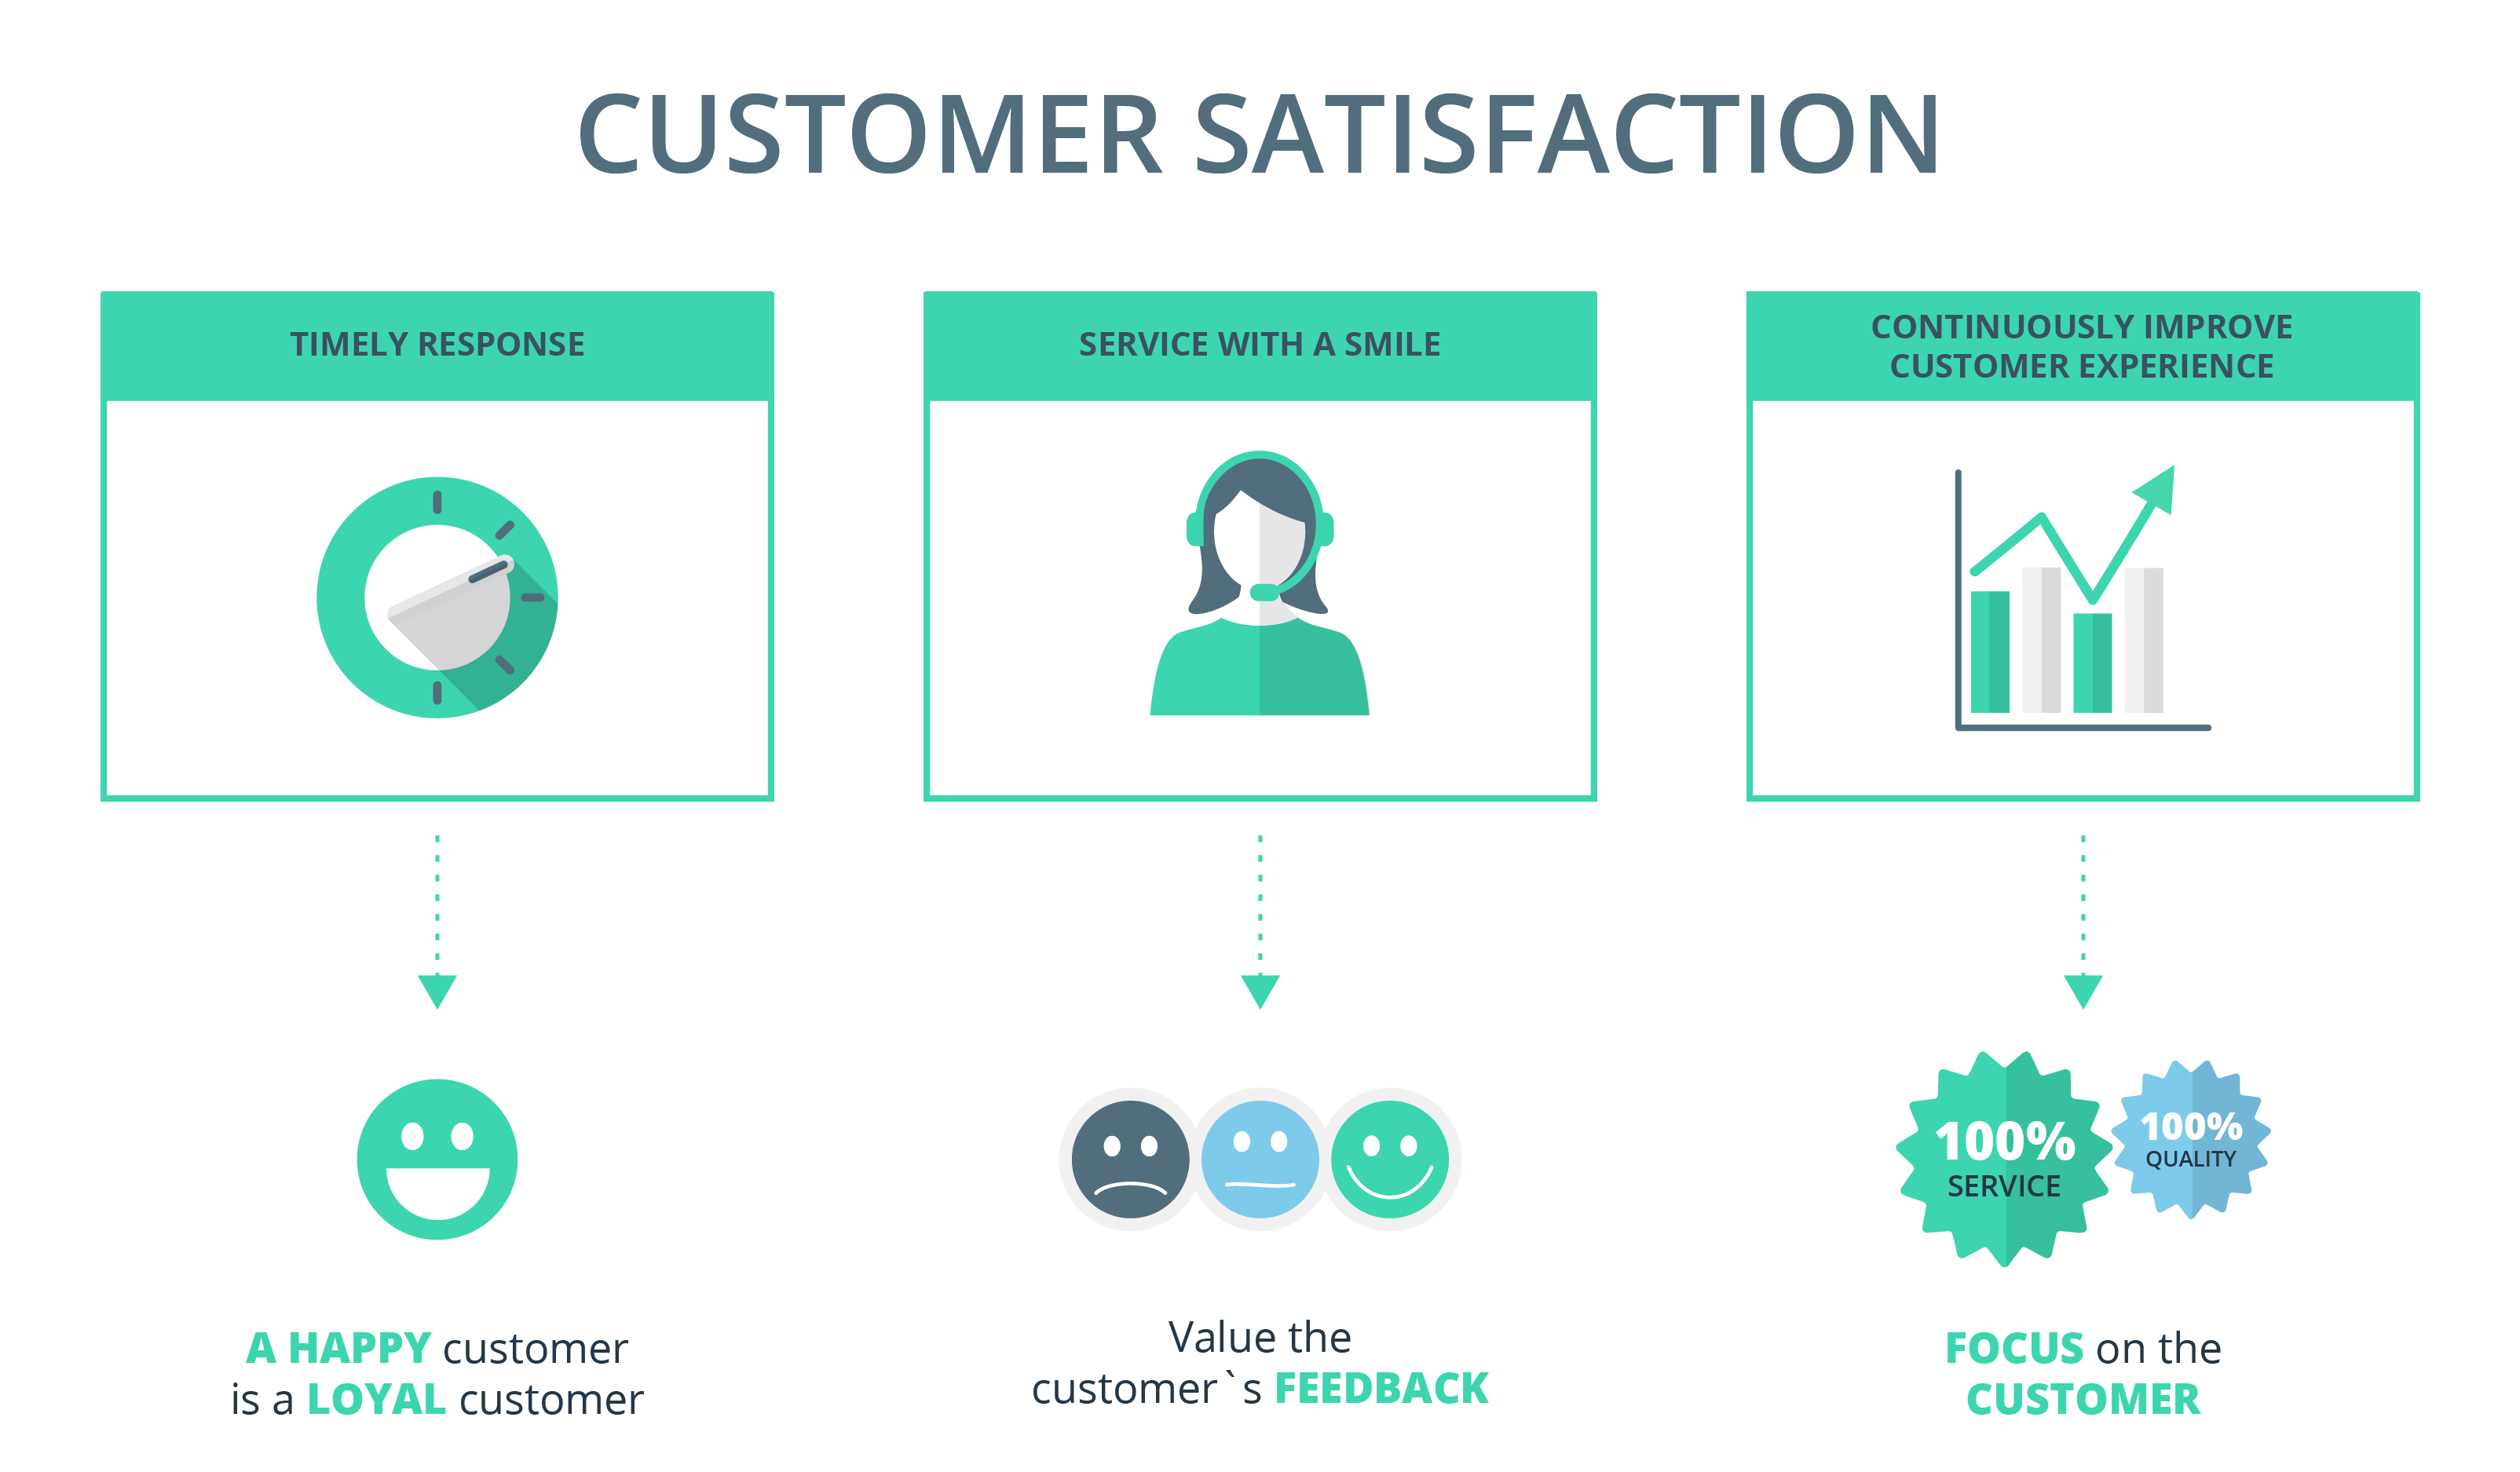

Churn analysis is the evaluation of a company’s customer loss rate in order to reduce it. Also referred to as customer attrition rate, churn can be minimized by assessing your product and how people use it.

I will have to understand all the features inorder to do analysis 
1. **Cost, insurance, and freight (CIF**) is an international shipping agreement, which represents the charges paid by a seller to cover the costs, insurance, and freight of a buyer's order while the cargo is in transit.
2. **CUS_DOB** : customers date of birth 
3. **Age** : Age of the customers
4. **CUS_Month_Income**: customer's monthly income 
5. **CUS_Gender**: Gender 
6. **CUS_Marital_Status**: status of marrige 
7. **CUS_Customer_Since** : 
8. **YEARS_WITH_US**: The years the customer has spent with the oragnization
9. **# total debit transactions for S1**: Number of debit trancastion in the account in the first session 
10. **# total debit transactions for S2**: Number of debit trancastion in the account in the second session.
11. **# total debit transactions for S3**: Number of debit trancastion in the account in the second session.
12. **total debit amount for S1** : Total debited amount in the session 1
13. **total debit amount for S2** : Total debited amount in the session 2
14. **total debit amount for S3** : Total debited amount in the session 3
15. **# total credit transactions for S1**: Number of credit trancastion in the account in the first session 
16. **# total credit transactions for S2**: Number of credit trancastion in the account in the second session.
17. **# total credit transactions for S3**: Number of credit trancastion in the account in the second session.
18. **total credit amount for S1** : Total credit amount in the session 1
19. **total credit amount for S2** : Total credit amount in the session 2
20. **total credit amount for S3** : Total credit amount in the session 3
21. **total debit amount** : Total amount debited from the account 
22.  **total debit transactions** : Total number of debit transactions happening from the account
23. **total credit amount** : Total amount credited from the account 
24.  **total credit transactions** : Total number of credit transactions happening from the account
25. **total transactions** : Total numbers of transactions that is debit + credit
26. **CUS_Target** : This is catagorical feature to understand 
27. **TAR_Desc** : This reffers to the Designation the customer 
28. **Status** : This is the value of interest as this states the status of the customers 






In [113]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [114]:
#Importing the libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
from pandas import set_option
plt.style.use('ggplot') # nice plots

#for modelling 


from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,recall_score
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

%config InlineBackend.figure_format = 'retina'

In [115]:
#Extra libraries
from scipy.stats.mstats import winsorize

In [116]:
#reading the data 
df = pd.read_excel('CHURNDATA (1).xlsx')

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   CIF                                 1249 non-null   object        
 1   CUS_DOB                             1249 non-null   object        
 2   AGE                                 1249 non-null   int64         
 3   CUS_Month_Income                    1238 non-null   float64       
 4   CUS_Gender                          1247 non-null   object        
 5   CUS_Marital_Status                  1249 non-null   object        
 6   CUS_Customer_Since                  1249 non-null   datetime64[ns]
 7   YEARS_WITH_US                       1249 non-null   int64         
 8   # total debit transactions for S1   1249 non-null   int64         
 9   # total debit transactions for S2   1249 non-null   int64         
 10  # total debit transactio

In [118]:
#Data Wrangling 
# filling  the missing values in the given data 
#Finding the mean of the column having NaN
mean_value=df['CUS_Month_Income'].mean()
df['CUS_Month_Income'].fillna(value=mean_value, inplace=True)
#for the gender values
# we can follow this approch as the data is very less

mode_value = df['CUS_Gender'].mode()[0]
mode_value
df['CUS_Gender'].fillna(value=mode_value, inplace=True)
mode_value

'MALE'

In [119]:
## Analyzing the numerc features and non numerci features 
#specifing the catagorrical Features and Numeric features 
numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])

In [120]:
#CIF has All the garbage values hence we can drop that colums 
categorical_data = categorical_data.drop('CIF', axis =1 )

## EXPLORATARY  DATA ANALYSIS 
This is the most important step to understand the data and anomaly is the data

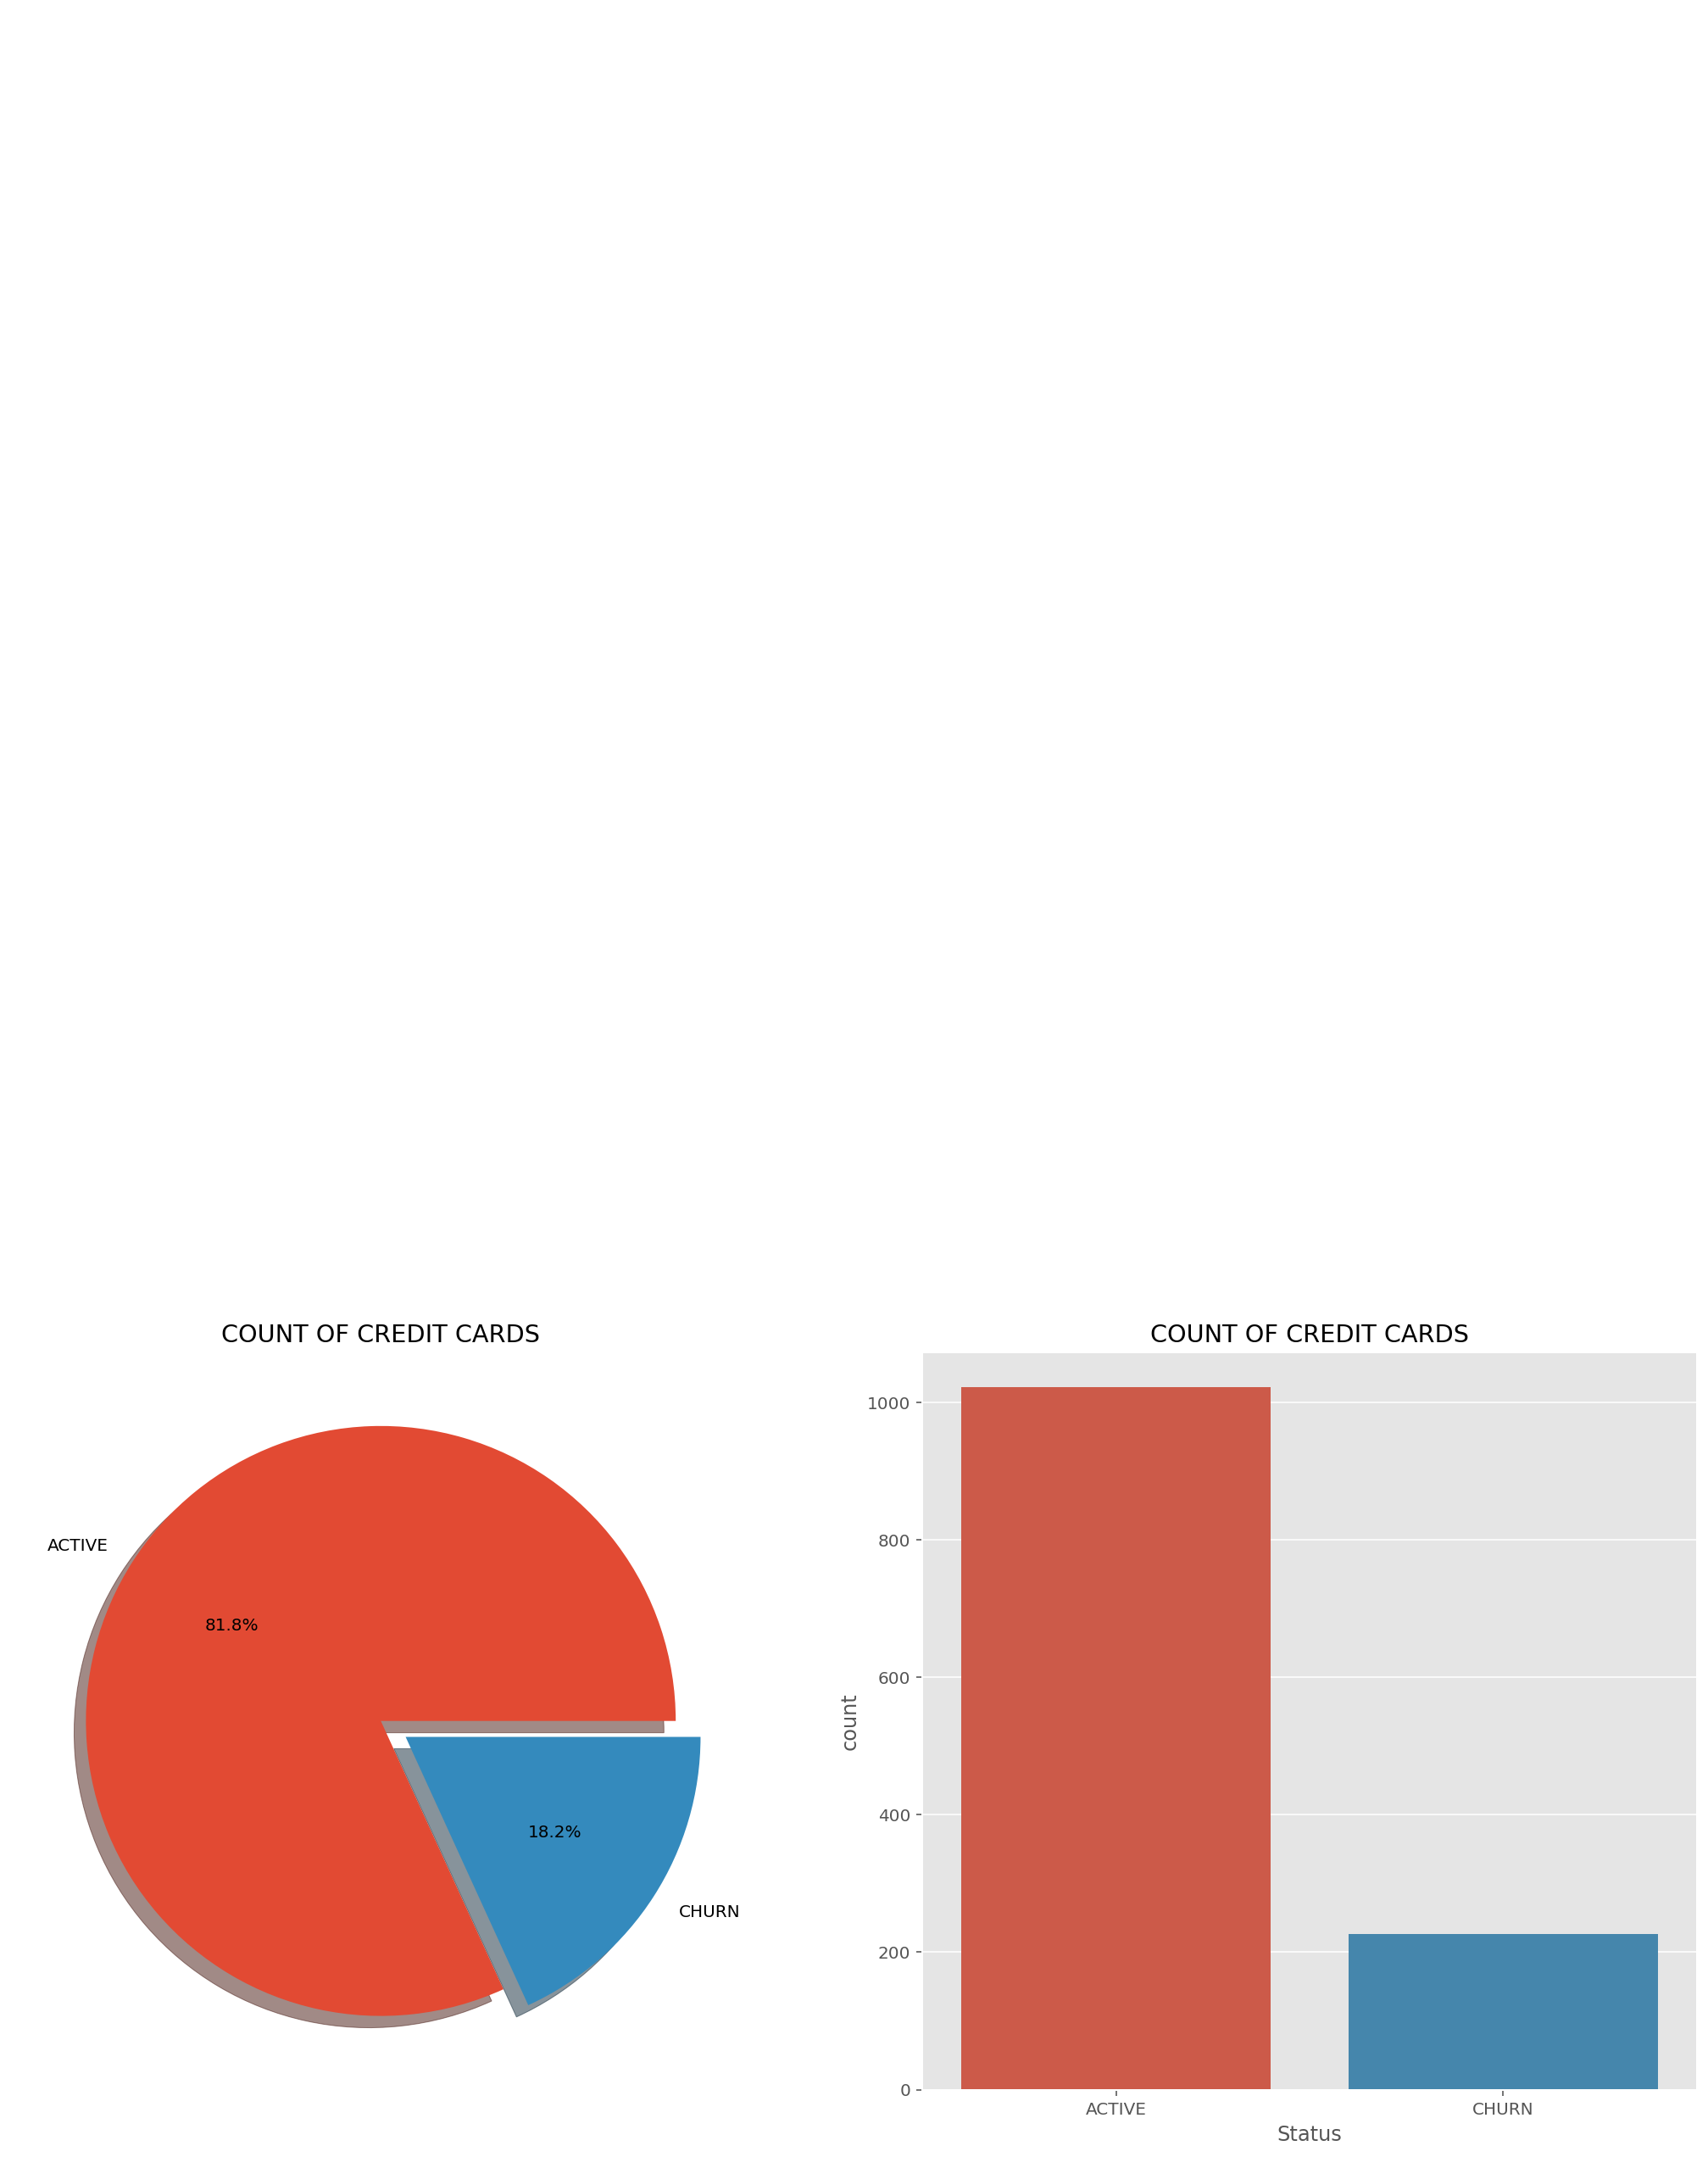

In [121]:
#target Feature analysis
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Status'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[1].set_title('COUNT OF CREDIT CARDS')
ax[0].set_title('COUNT OF CREDIT CARDS')
ax[0].set_ylabel('')
sns.countplot('Status',data=df,ax=ax[1])
plt.annotate('Non-default: {}'.format(0), xy=(-0.3, 15000), xytext=(-0.3, 3000), size=12)
plt.annotate('Default: {}'.format(1), xy=(0.7, 15000), xytext=(0.7, 3000), size=12)
ax[1].set_title('COUNT OF CREDIT CARDS')
plt.show()

In [122]:
#stastucal aspect 
df.describe()

,AGE,CUS_Month_Income,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,# total debit transactions for S3,total debit amount for S1,total debit amount for S2,total debit amount for S3,# total credit transactions for S1,...,# total credit transactions for S3,total credit amount for S1,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target
count,1249.000000,1.249000e+03,1249.000000,1249.000000,1249.000000,1249.000000,1.249000e+03,1.249000e+03,1.249000e+03,1249.000000,...,1249.000000,1.249000e+03,1.249000e+03,1.249000e+03,1.249000e+03,1249.000000,1.249000e+03,1249.000000,1249.000000,1249.000000
mean,46.746998,2.764869e+06,14.116894,54.262610,55.680544,56.966373,3.147439e+05,3.090418e+05,3.061457e+05,7.613291,...,8.675741,3.089540e+05,3.173819e+05,3.020052e+05,9.299314e+05,166.909528,9.283411e+05,24.559648,191.469175,2222.296237
std,12.315109,5.382881e+06,2.279882,80.732325,81.020146,84.649516,1.513433e+06,1.293928e+06,9.385775e+05,13.543207,...,14.087572,1.631418e+06,1.048443e+06,1.273680e+06,3.142967e+06,235.386076,3.685585e+06,38.467079,263.353988,3.314255
min,14.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,1.000000,2211.000000
25%,39.000000,8.083000e+03,14.000000,7.000000,6.000000,6.000000,1.155000e+04,1.122578e+04,7.085000e+03,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,5.642350e+04,26.000000,1.511744e+04,2.000000,33.000000,2222.000000
50%,46.000000,1.500000e+06,14.000000,22.000000,24.000000,24.000000,5.395632e+04,6.158130e+04,5.907391e+04,6.000000,...,6.000000,4.522084e+04,4.679082e+04,4.952000e+04,2.031400e+05,74.000000,1.525319e+05,18.000000,90.000000,2223.000000
75%,55.000000,3.000000e+06,14.000000,65.000000,65.000000,68.000000,1.892775e+05,2.096500e+05,2.250619e+05,8.000000,...,10.000000,1.720000e+05,1.872971e+05,1.950319e+05,6.613808e+05,196.000000,5.853255e+05,28.000000,227.000000,2223.000000
max,119.000000,8.000000e+07,28.000000,715.000000,547.000000,757.000000,3.573349e+07,3.723382e+07,1.866511e+07,189.000000,...,169.000000,4.920688e+07,1.753799e+07,3.764708e+07,6.997262e+07,1859.000000,1.043919e+08,429.000000,2174.000000,2236.000000


In [123]:
"""
    Function for getting aan analysis with the catagorical featues avalible in the data
    This will tell us the count and will give us the camparitive analysis
"""
def ploting_cat(df,x_col,hue_x,labelx,labely):
  plt.rcParams['figure.figsize']=20,5
  plt.subplot(121)

  ax = sns.countplot(data = df, x = x_col)

  plt.xlabel(labelx, fontsize= 12)
  plt.ylabel(labely, fontsize= 12) 
  plt.subplot(122)
  ax =sns.countplot(data = df, x = x_col, hue=hue_x)
  plt.ylim(0,800)

  for p in ax.patches:
      ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+50))

  plt.show()

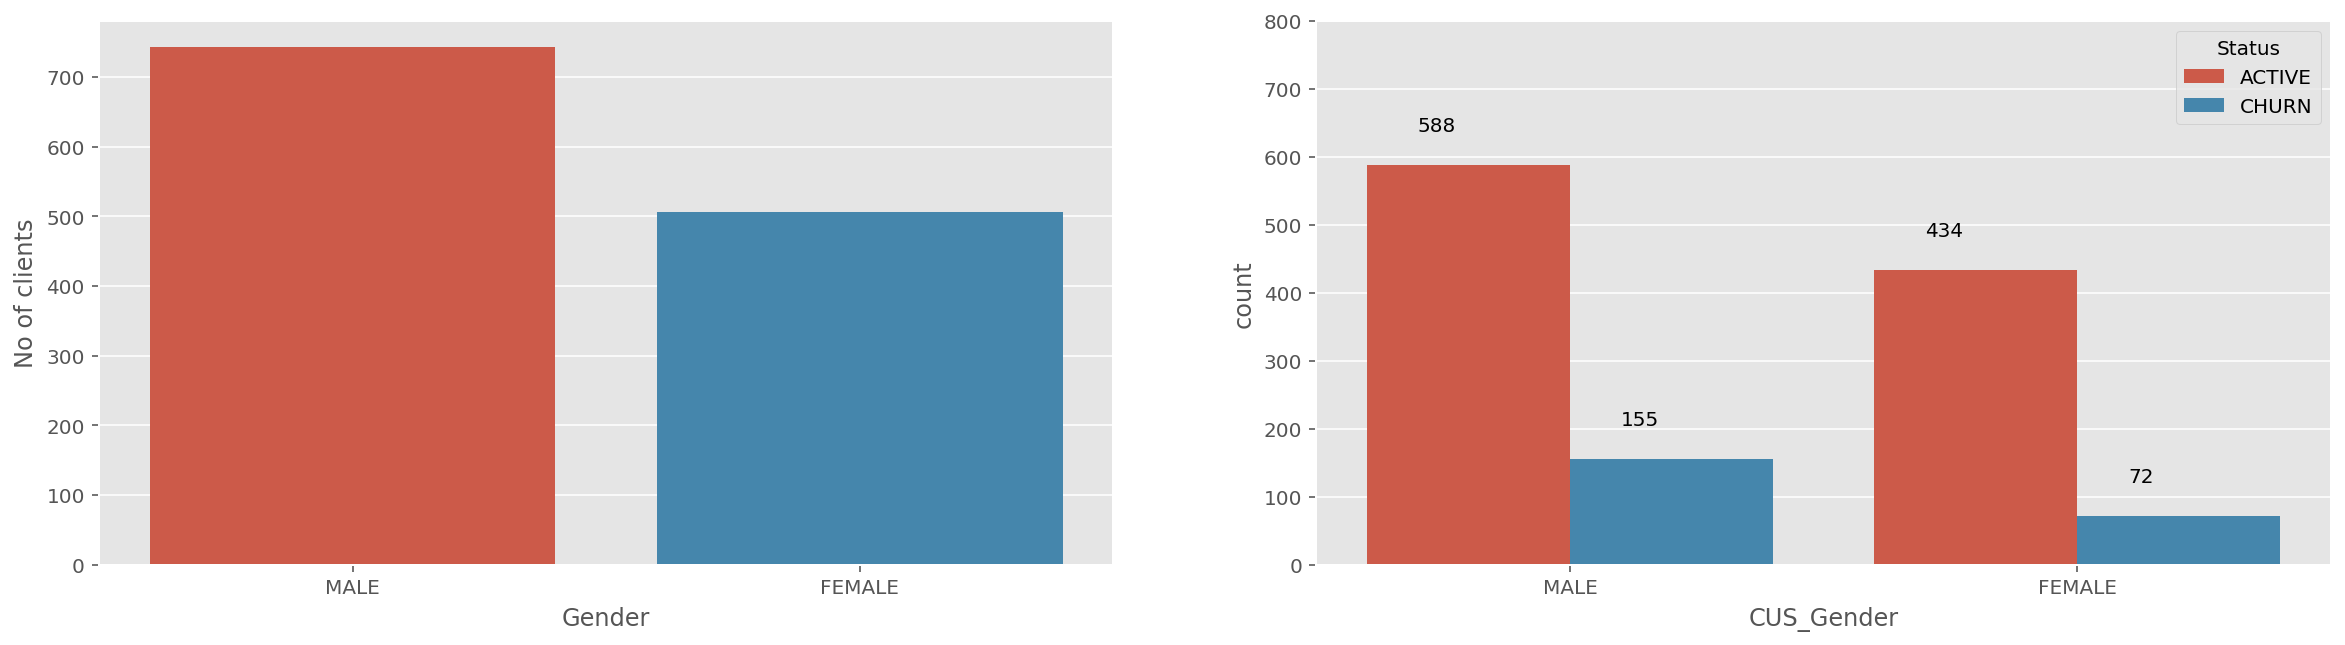

In [124]:
ploting_cat(df, "CUS_Gender","Status","Gender","No of clients")

In the plots we can see the distribution is almost equal and hence this is a parameter of less diversity

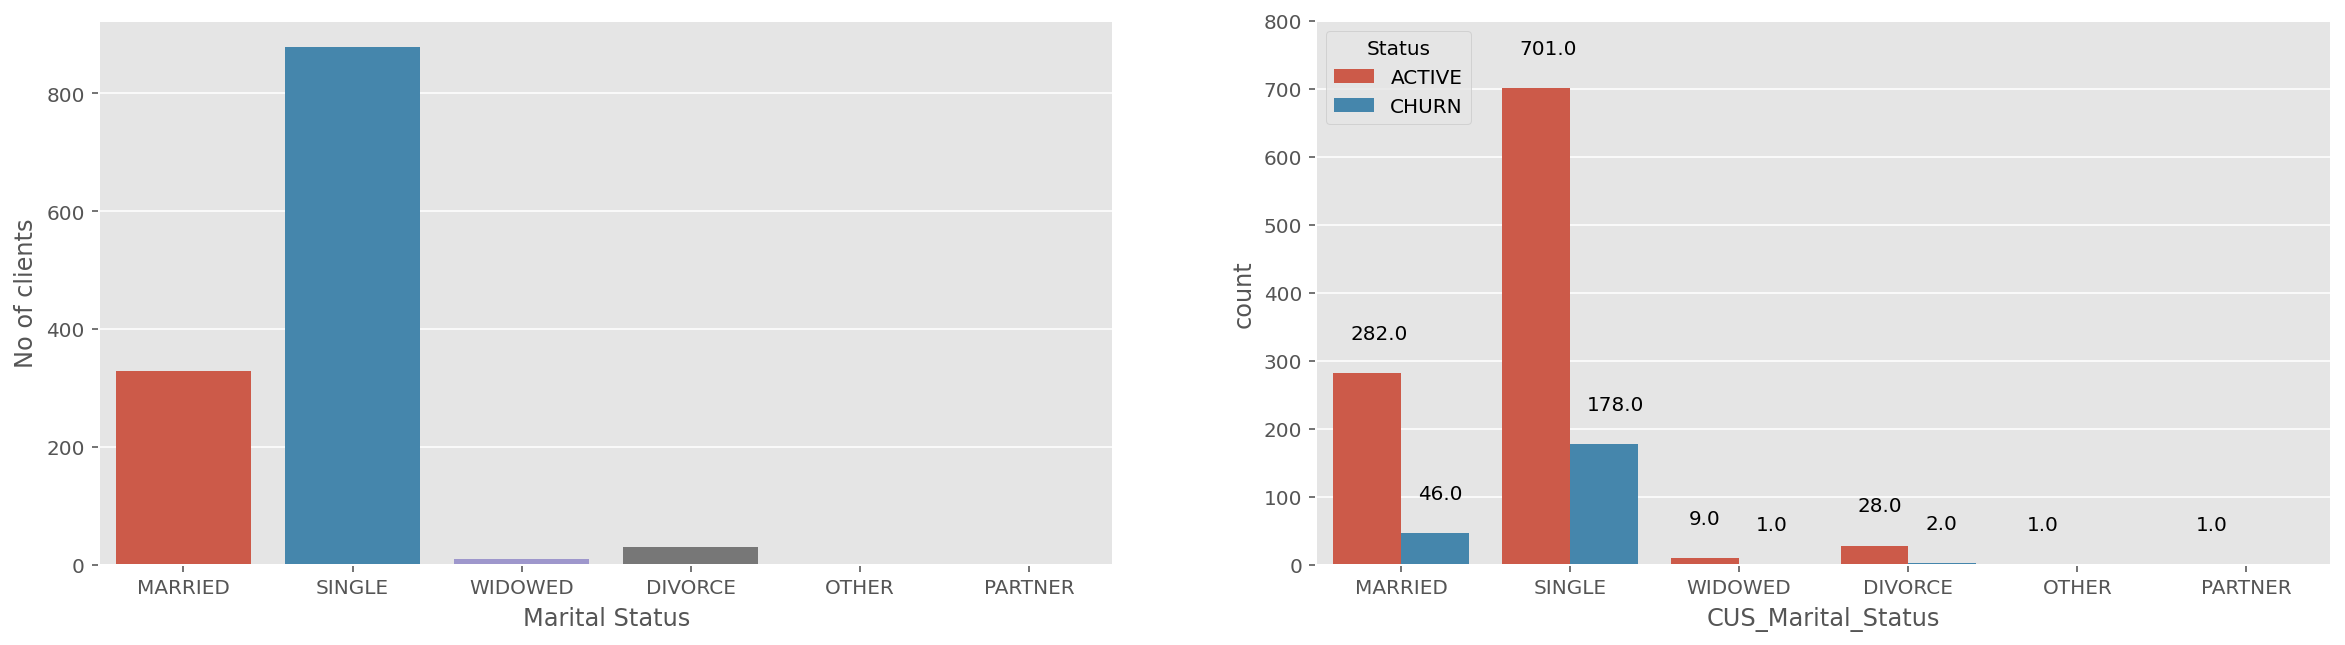

In [125]:
ploting_cat(df, "CUS_Marital_Status","Status","Marital Status","No of clients")

In this feature there is lot of variation and one specific catagory of client is predominenet There are variation but a majority of the data has been utilised with the single clients

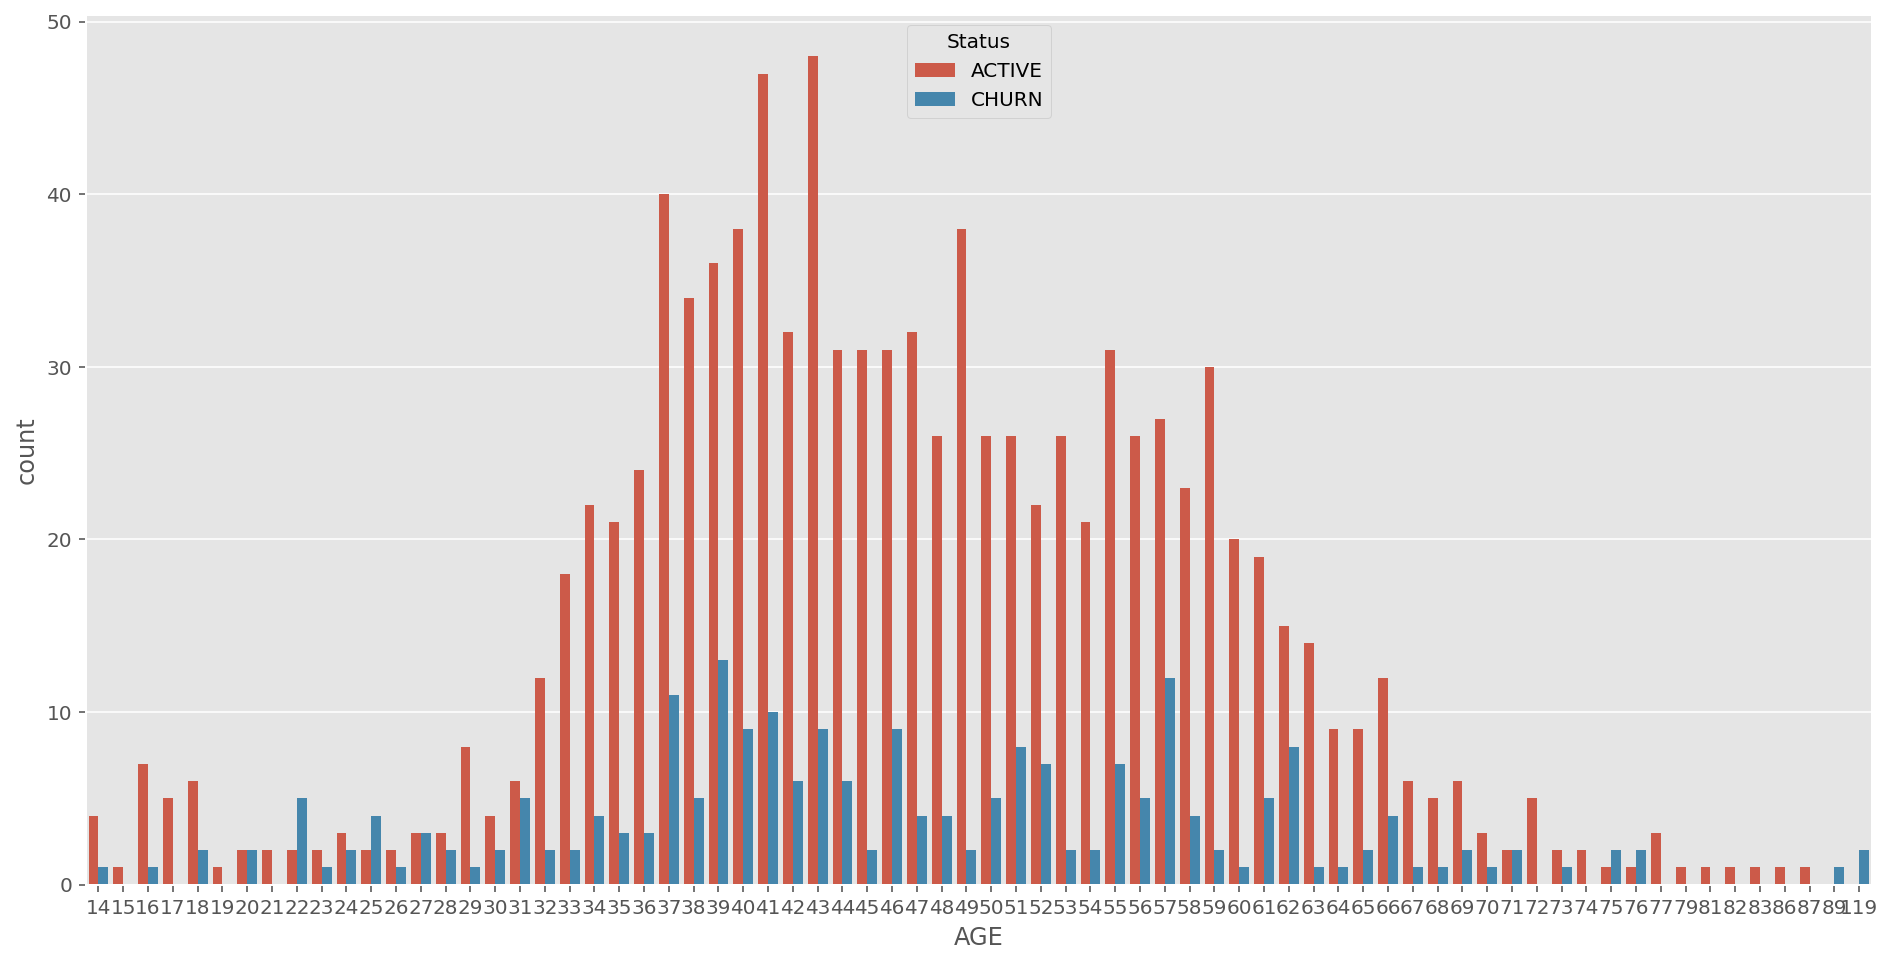

In [126]:
countplt, ax = plt.subplots(figsize = (16,8))
ax=sns.countplot(x="AGE",hue="Status",data=df)

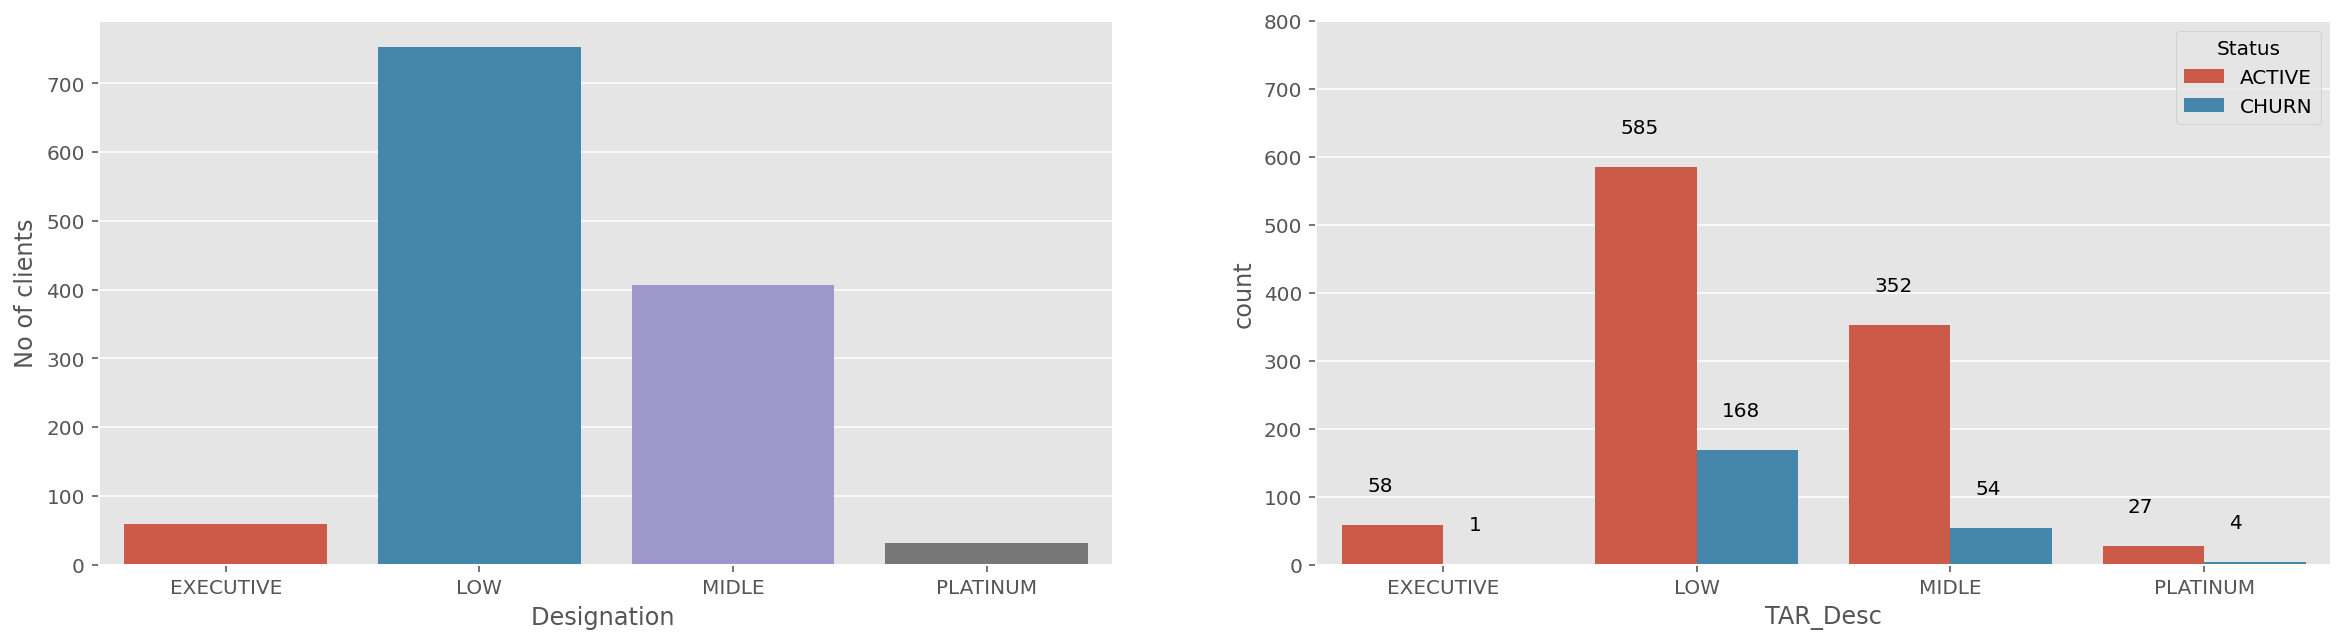

In [127]:
ploting_cat(df, "TAR_Desc","Status","Designation ","No of clients")

Here the date of joining is synonymus to the clients tenure in the company and hence that can be neglected

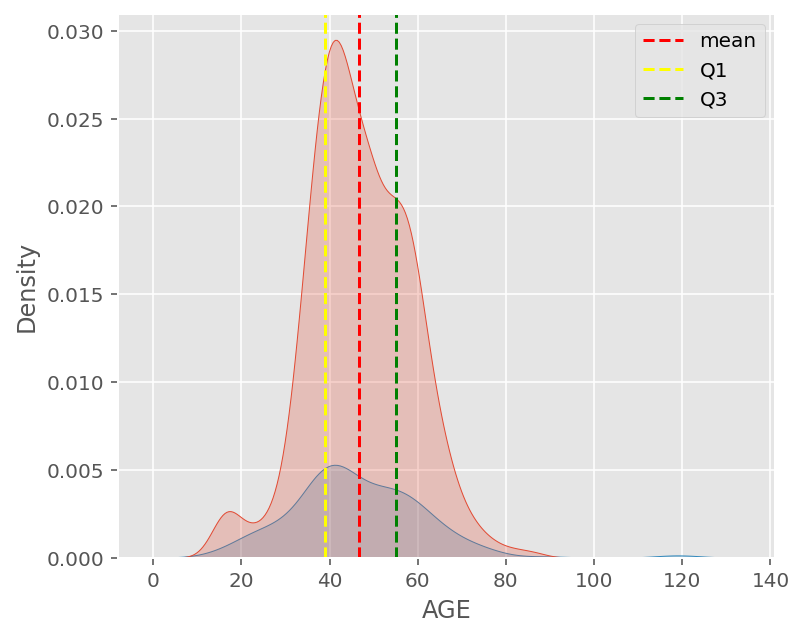

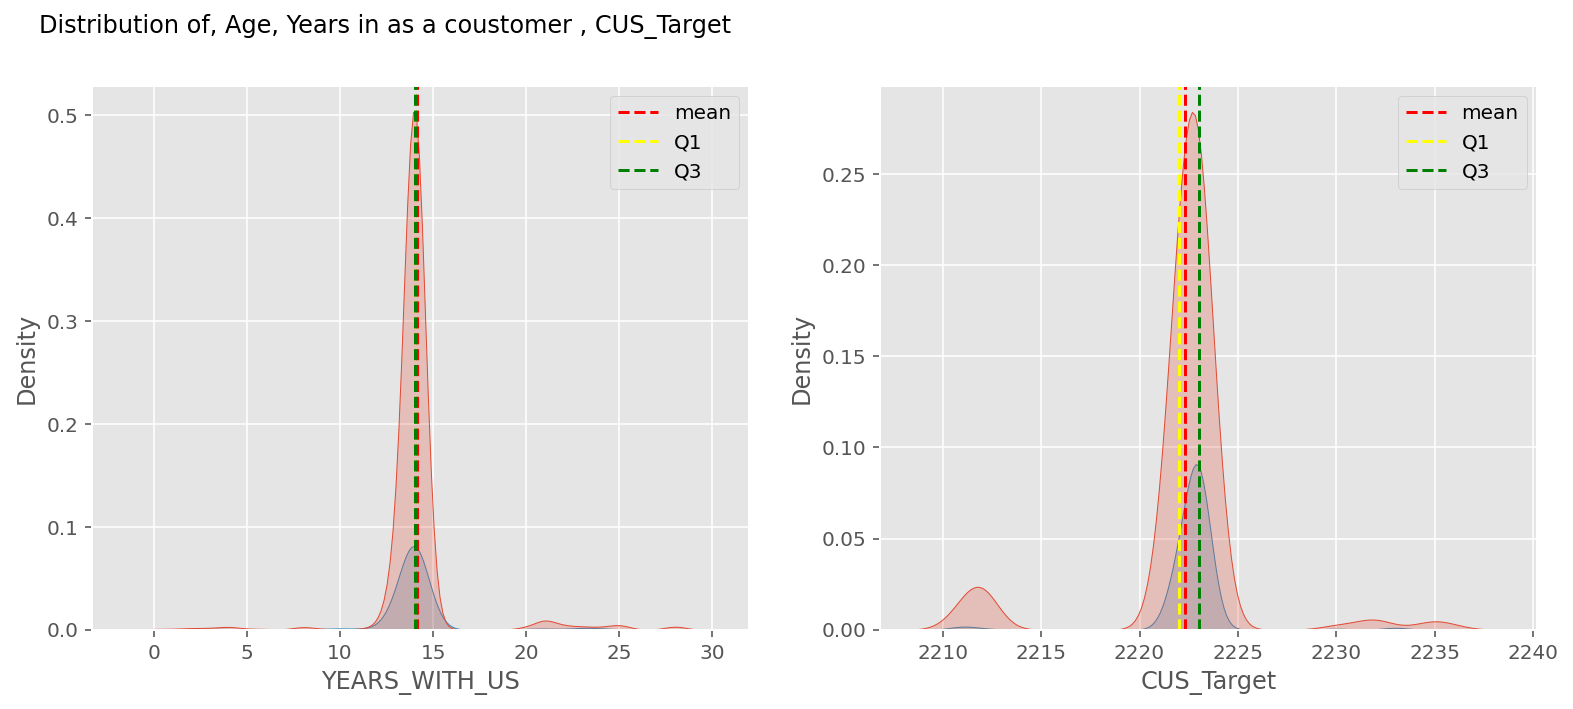

In [128]:
#understanding teh numerical featuers
#understanding the continuous data

plt.rcParams['figure.figsize']=20,5
plt.subplot(131)
sns.kdeplot(x= 'AGE', data = df, hue = 'Status', fill= 'blue')
plt.axvline(df['AGE'].mean(),c='red', ls='--' , label='mean')
plt.axvline(np.percentile(df['AGE'],25),c='yellow', ls='--' , label='Q1')
plt.axvline(np.percentile(df['AGE'],75),c='green', ls='--' , label='Q3')
plt.legend(loc='upper right')
plt.show()

plt.subplot(132)
sns.kdeplot(x= 'YEARS_WITH_US', data = df, hue = 'Status',fill= 'red')
plt.axvline(df['YEARS_WITH_US'].mean(),c='red', ls='--' , label='mean')
plt.axvline(np.percentile(df['YEARS_WITH_US'],25),c='yellow', ls='--' , label='Q1')
plt.axvline(np.percentile(df['YEARS_WITH_US'],75),c='green', ls='--' , label='Q3')
plt.legend(loc='upper right')

plt.subplot(133)
sns.kdeplot(x = 'CUS_Target',data = df , hue = 'Status' ,fill= 'red')

plt.axvline(df['CUS_Target'].mean(),c='red', ls='--' , label='mean')
plt.axvline(np.percentile(df['CUS_Target'],25),c='yellow', ls='--' , label='Q1')
plt.axvline(np.percentile(df['CUS_Target'],75),c='green', ls='--' , label='Q3')
plt.legend(loc='upper right')

plt.suptitle('Distribution of, Age, Years in as a coustomer , CUS_Target')
plt.show()

In [129]:
from scipy.stats import kurtosis
print(kurtosis(df['YEARS_WITH_US'], fisher=True))

18.484574884184134


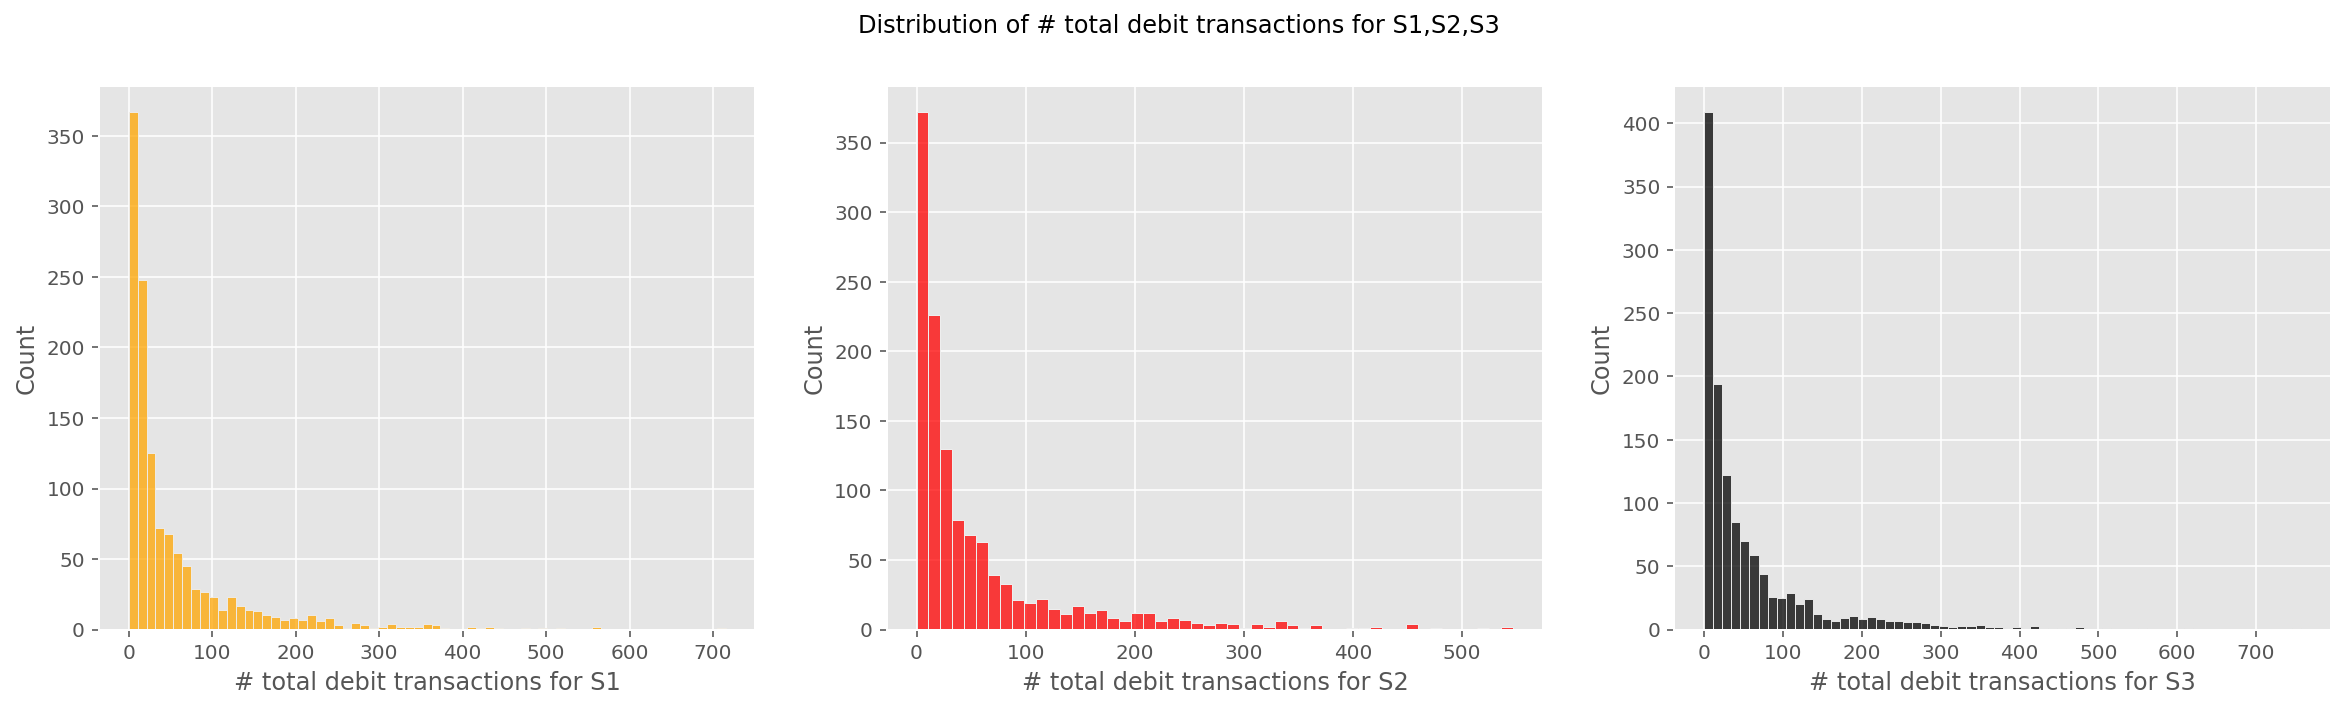

In [130]:
plt.rcParams['figure.figsize']=20,5
plt.subplot(131)
sns.histplot(df['# total debit transactions for S1'], color='orange')

plt.subplot(132)
sns.histplot(df['# total debit transactions for S2'], color='red')

plt.subplot(133)
sns.histplot(df['# total debit transactions for S3'], color='black')

plt.suptitle('Distribution of # total debit transactions for S1,S2,S3')
plt.show()

Basically This is the number of the transcations performed by the customers this is rightly skwed with proper transformation this can be handeled well

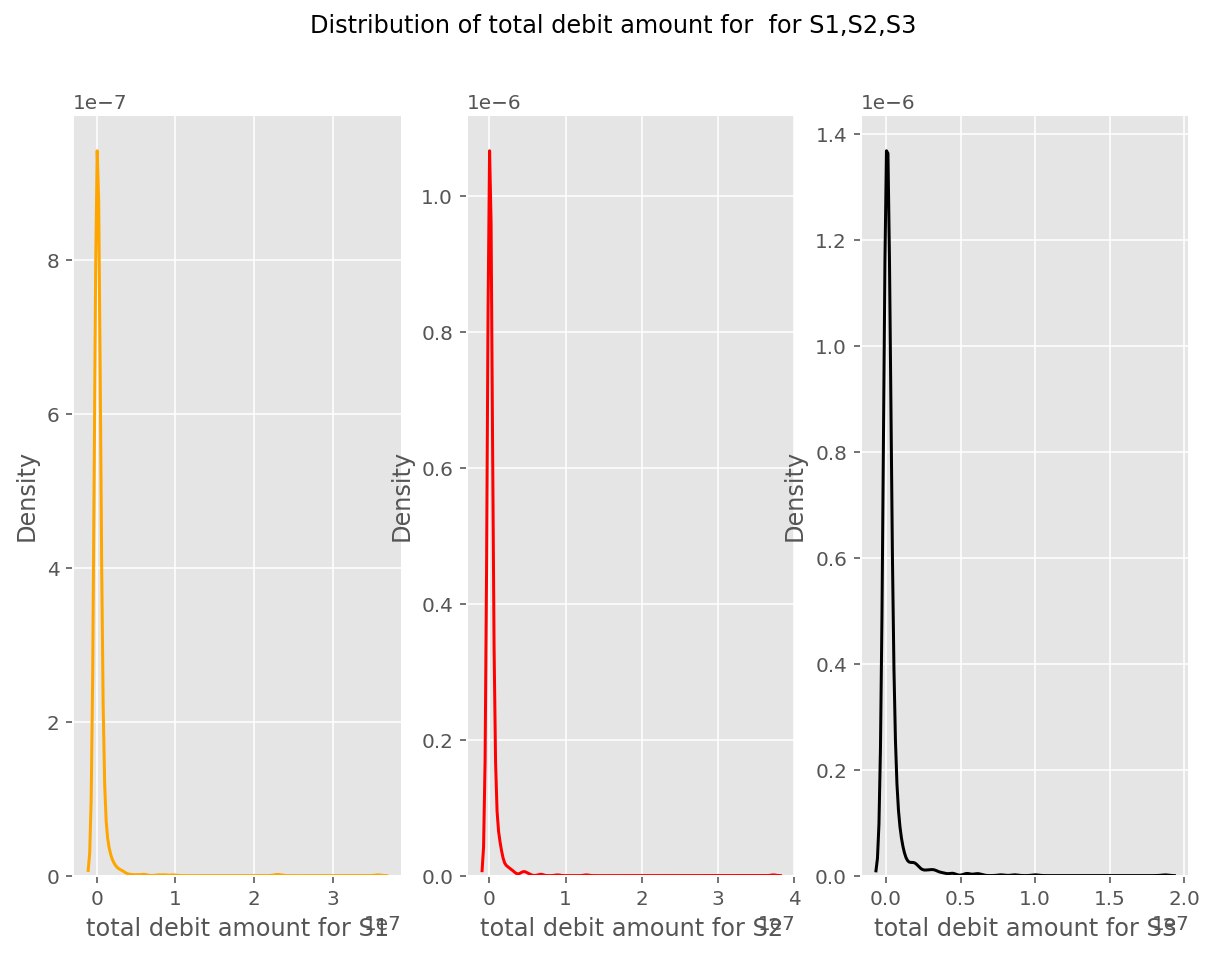

In [131]:
plt.rcParams['figure.figsize']=10,7
plt.subplot(131)
sns.kdeplot(df['total debit amount for S1'], color='orange')


plt.subplot(132)
sns.kdeplot(df['total debit amount for S2'], color='red')

plt.subplot(133)
sns.kdeplot(df['total debit amount for S3'], color='black')

plt.suptitle('Distribution of total debit amount for  for S1,S2,S3')
plt.show()

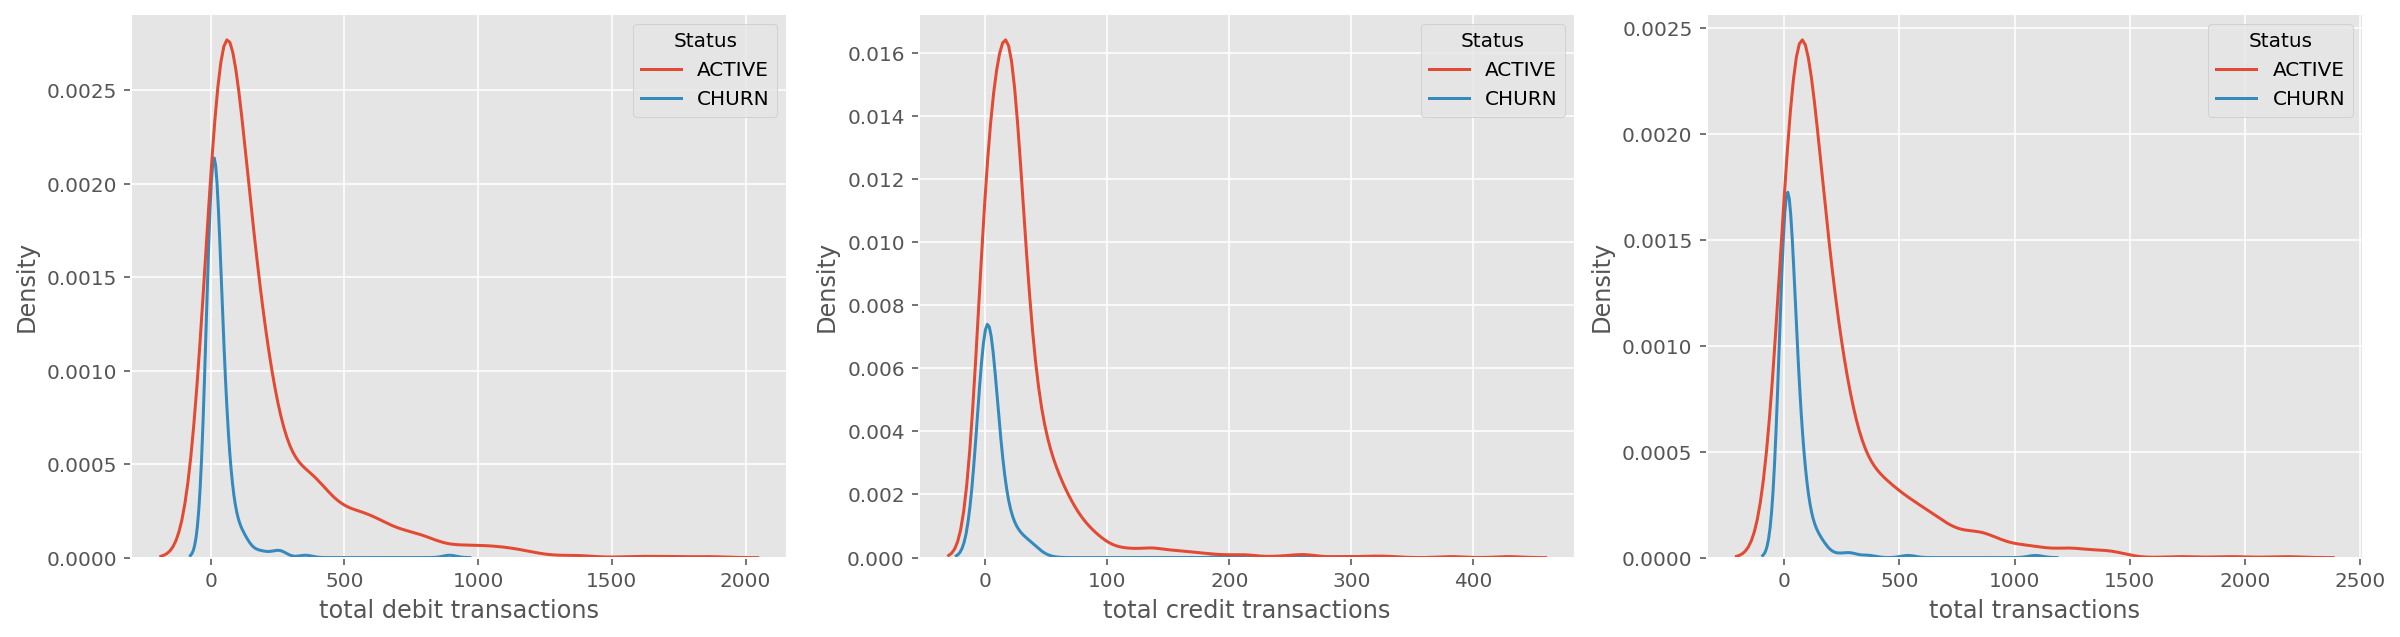

In [132]:
plt.rcParams['figure.figsize']=20,5
plt.subplot(131)
sns.kdeplot(x= 'total debit transactions', data = df, hue = 'Status')

plt.subplot(132)
sns.kdeplot(x= 'total credit transactions', data = df, hue = 'Status')

plt.subplot(133)
sns.kdeplot(x = 'total transactions',data = df , hue = 'Status')

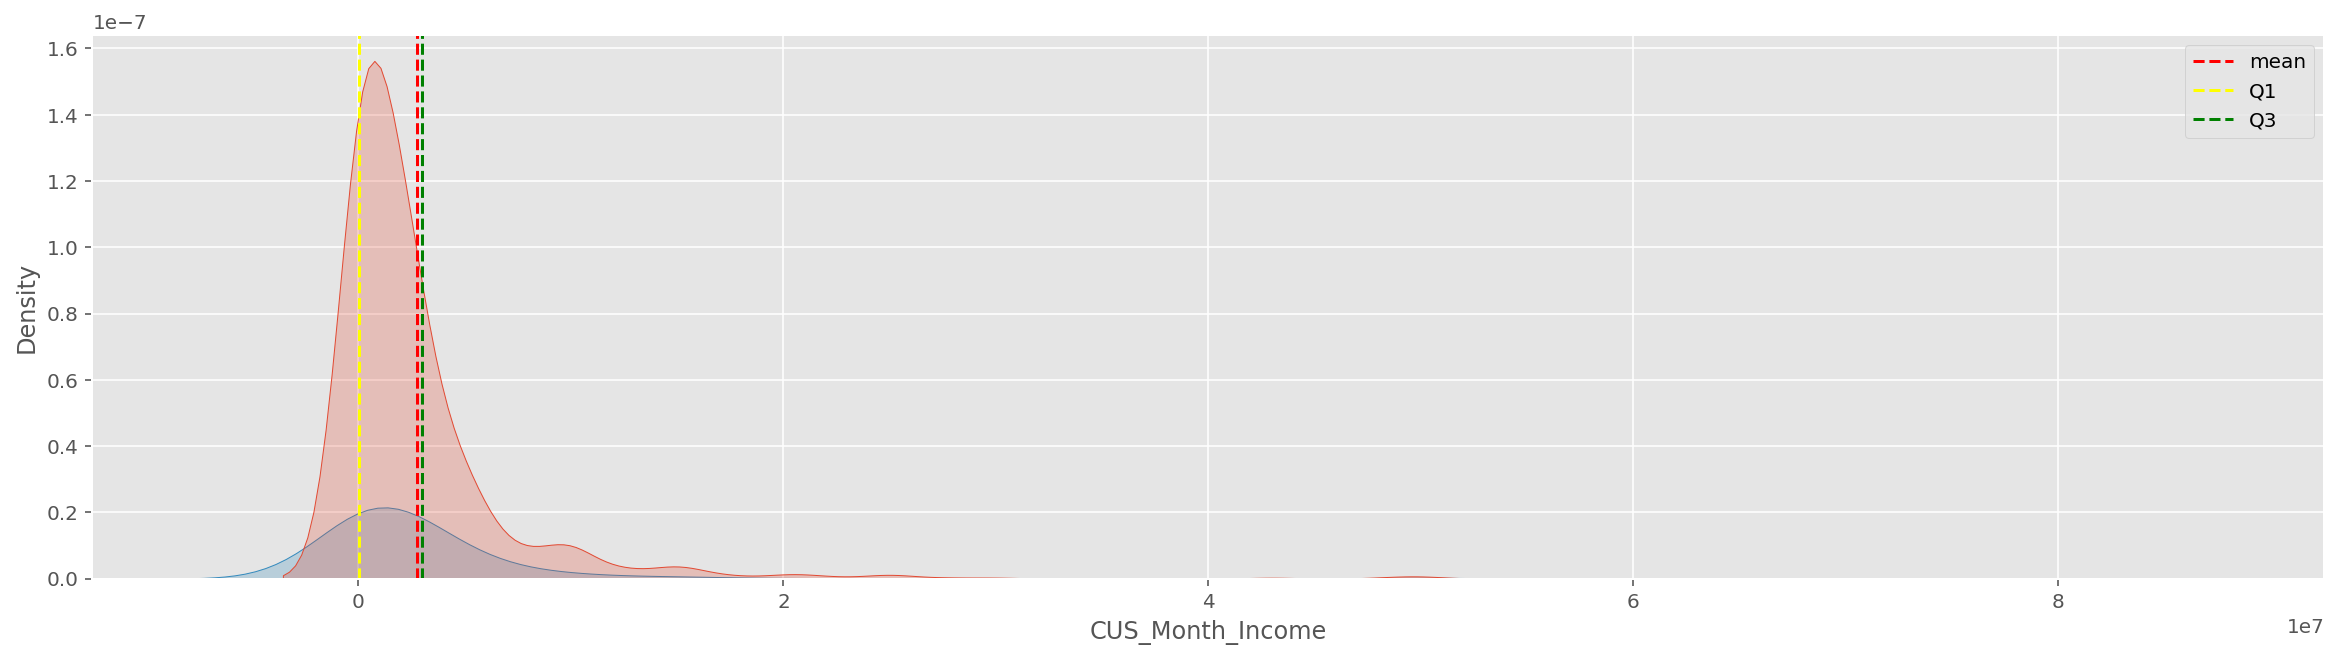

In [133]:

sns.kdeplot(x= 'CUS_Month_Income', data = df, hue = 'Status', fill= 'blue')
plt.axvline(df['CUS_Month_Income'].mean(),c='red', ls='--' , label='mean')
plt.axvline(np.percentile(df['CUS_Month_Income'],25),c='yellow', ls='--' , label='Q1')
plt.axvline(np.percentile(df['CUS_Month_Income'],75),c='green', ls='--' , label='Q3')
plt.legend(loc='upper right')
plt.show()

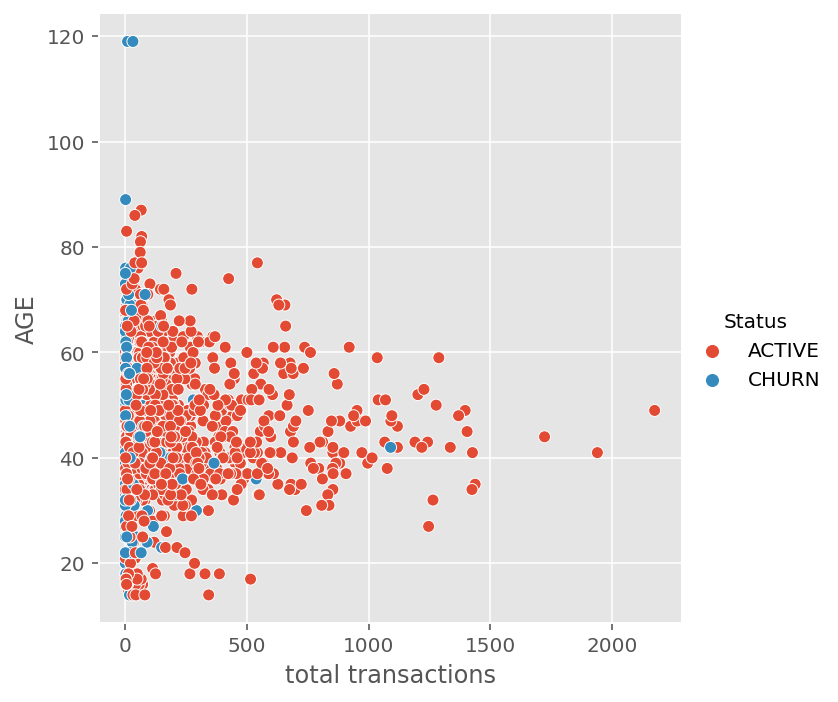

(0.0, 100000000.0)

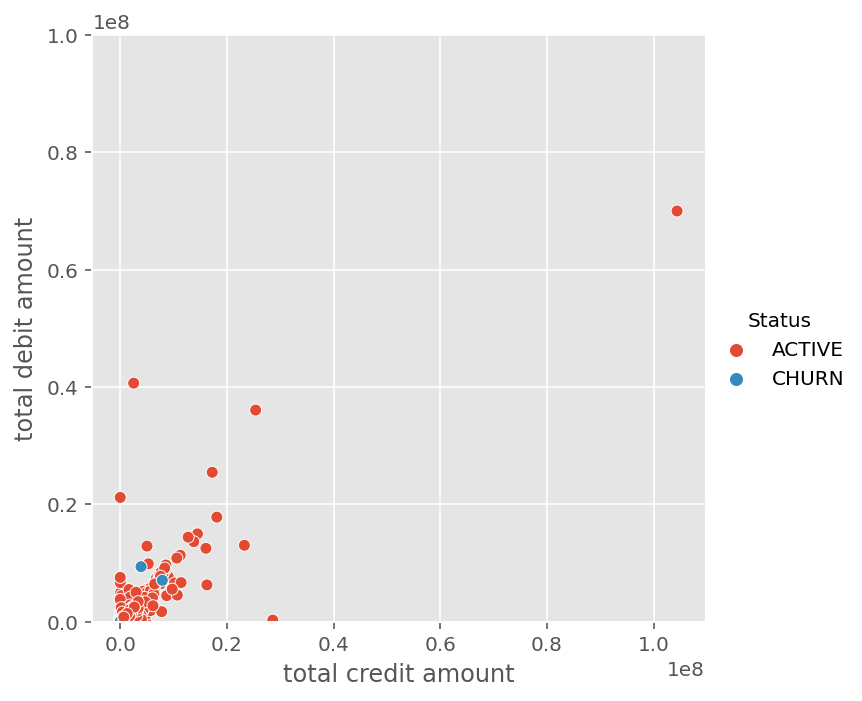

In [134]:
sns.relplot(y ="AGE", x = "total transactions" , data = df,hue = "Status")
plt.show()
sns.relplot(y ="total debit amount", x = "total credit amount" , data = df, hue = "Status")
plt.ylim(0,100000000)

(0.0, 100000000.0)

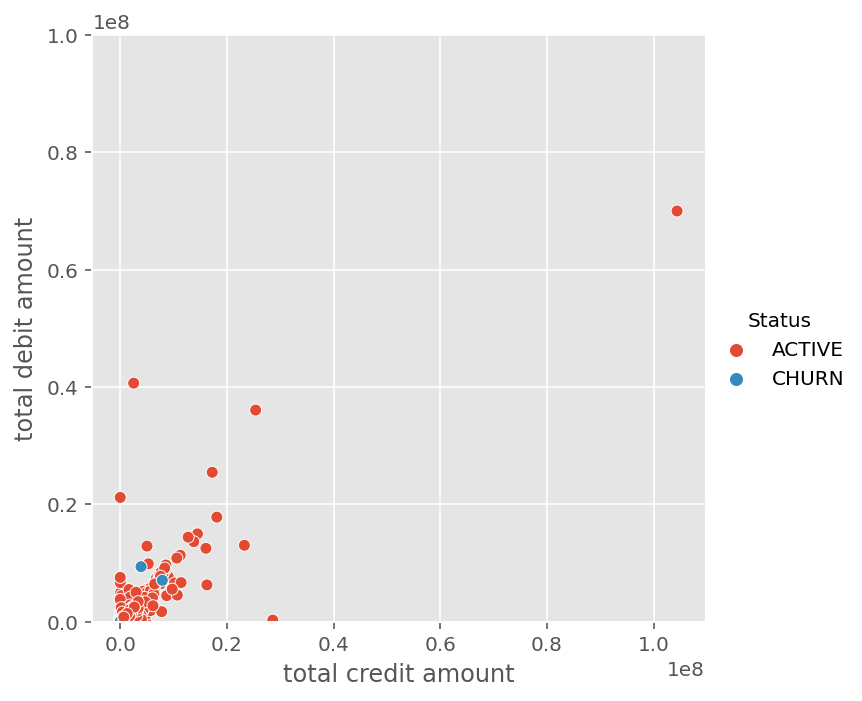

In [135]:
sns.relplot(y ="total debit amount", x = "total credit amount" , data = df, hue = "Status")
plt.ylim(0,100000000)

# 1. The target coutmers are in the age group of 30 to 50 

# 2.   The coustomers average spane in the comapny is 15 years
# 3.  The customers years in organization is highly kurtosized and  hence feature need to treated well 
# 4. The data is skewed and feature engineering will be requied 


### Feature Engineering 

In [136]:
'''Lastly we introduce a variable to capture total transactions given age to take into account credit behaviour visavis adult life
:-)'''
df['CreditScoreGivenAge'] = df['total transactions']/(df['AGE'])

In [137]:
#we can drop the columns CIF it has no unique value , 'CUS_DOB',  as  the age 'CUS_DOB they represent the same thing 
df = df.drop('CIF' , axis = 1)
df= df.drop('CUS_DOB', axis = 1)

In [138]:
# change the data type to data 
df['CUS_Customer_Since'] = pd.to_datetime(df['CUS_Customer_Since'])

In [139]:
# decoding our target varible for our understandig 
df['Status'].replace('ACTIVE', 1, inplace = True)
df['Status'].replace('CHURN', 0, inplace = True)

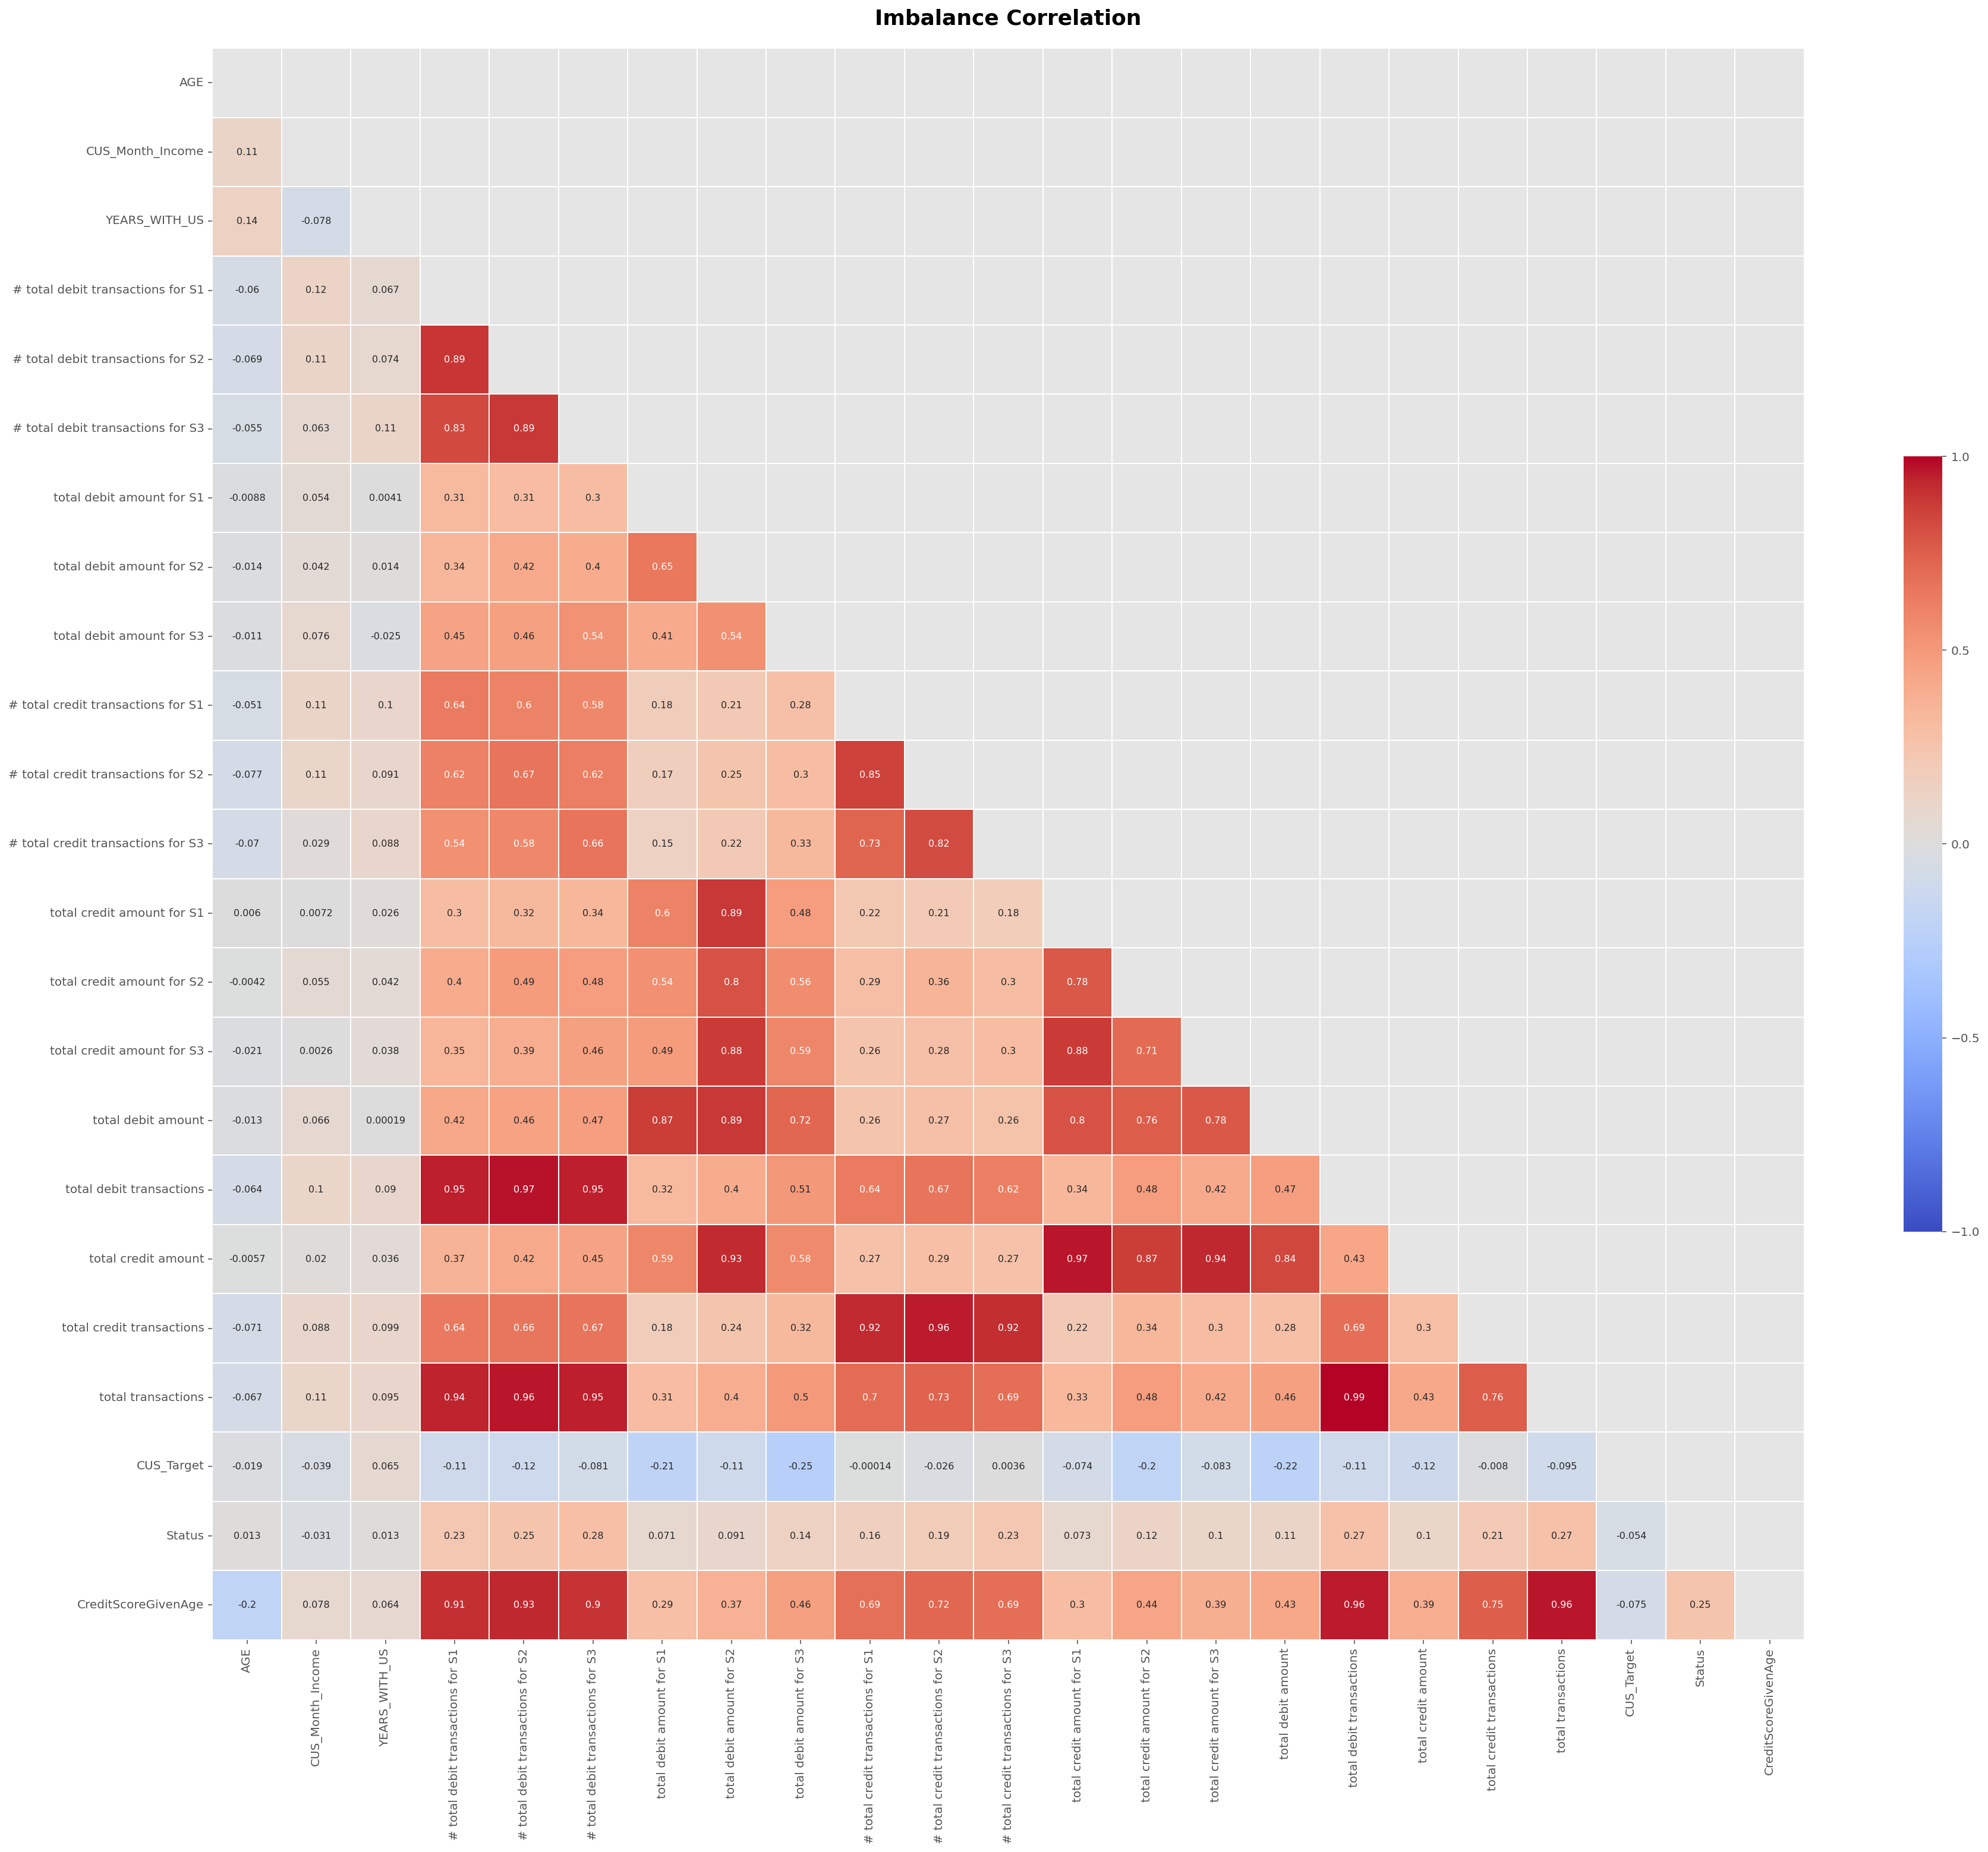

In [140]:
# starting with the correlation between the numeric variable 
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)]= True


f, axes = plt.subplots(ncols=1, figsize=(30,30))

heatmap = sns.heatmap(df.corr(),
            mask = mask,
            square = True,
            linewidths = .5,
            cmap = 'coolwarm',
            cbar_kws = {'shrink': .4,"ticks" : [-1, -.5, 0, 0.5, 1]},
            vmin = -1,
            vmax = 1,
            annot = True,
            annot_kws = {"size": 8})
axes.set_title('Imbalance Correlation', size = 18, weight='bold', pad=20);

In [141]:
corrs_results = df.corrwith(df["Status"]).abs().nlargest(30)
corrs_results

Status                                1.000000
# total debit transactions for S3     0.284018
total transactions                    0.269177
total debit transactions              0.266835
CreditScoreGivenAge                   0.254358
# total debit transactions for S2     0.251523
# total credit transactions for S3    0.232120
# total debit transactions for S1     0.227776
total credit transactions             0.210039
# total credit transactions for S2    0.190187
# total credit transactions for S1    0.163516
total debit amount for S3             0.140709
total credit amount for S2            0.121431
total debit amount                    0.113487
total credit amount for S3            0.103554
total credit amount                   0.102586
total debit amount for S2             0.090785
total credit amount for S1            0.072870
total debit amount for S1             0.070799
CUS_Target                            0.053741
CUS_Month_Income                      0.030900
YEARS_WITH_US

In [142]:
## droping the data 
list_col = ['total debit amount for S2','# total credit transactions for S2']

In [143]:
for col in list_col:
  df  = df.drop(col,axis = 1)

In [144]:
## treating the outliers 
"""
Getting the numbers of the outliers 
and then treating the outliers 

    """

def Z_score(data,col_name):
  mean = np.mean(data[col_name]) 
  std = np.std(data[col_name]) 
  print('Mean of the given series :', mean) 
  print('STD Deviation of given series :', std)
  threshold = 3
  outlier = [] 
  for i in data[col_name]: 
      z = (i-mean)/std 
      if z > threshold: 
          outlier.append(i) 
  print('Outlier in the dataset is (Teen agers):', outlier)


In [145]:
Z_score(df,'total transactions')

Mean of the given series : 191.46917534027222
STD Deviation of given series : 263.24854090009563
Outlier in the dataset is (Teen agers): [2174, 1396, 1264, 996, 1066, 1335, 1118, 1404, 1277, 1426, 1242, 1288, 1190, 1202, 1369, 1014, 1722, 1218, 1118, 1039, 987, 1227, 1939, 1091, 1437, 1095, 1035, 1069, 1076, 1246, 1090, 1424]


In [146]:
numeric_data = df.select_dtypes(include=[np.number])

As all the data which have rightly skweed we can handel with log transformation

In [147]:
df_transformed = df.copy()

In [148]:
## getting log transform for the data
cols_name = numeric_data.columns
cols_name

Index(['AGE', 'CUS_Month_Income', 'YEARS_WITH_US',
       '# total debit transactions for S1',
       '# total debit transactions for S2',
       '# total debit transactions for S3', 'total debit amount for S1',
       'total debit amount for S3', '# total credit transactions for S1',
       '# total credit transactions for S3', 'total credit amount for S1',
       'total credit amount for S2', 'total credit amount for S3',
       'total debit amount', 'total debit transactions', 'total credit amount',
       'total credit transactions', 'total transactions', 'CUS_Target',
       'Status', 'CreditScoreGivenAge'],
      dtype='object')

In [149]:
for col in cols_name:
  df_transformed[col] = np.cbrt(df_transformed[col])

In [150]:
df_transformed.head()

,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,CUS_Customer_Since,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,# total debit transactions for S3,total debit amount for S1,...,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,TAR_Desc,Status,CreditScoreGivenAge
0,3.659306,19.234977,MALE,MARRIED,1994-06-30,2.924018,6.518684,6.423158,7.013579,113.422094,...,133.487323,168.196761,9.608182,178.209127,4.020726,9.837369,13.066718,EXECUTIVE,1.0,2.688316
1,3.583048,114.471424,FEMALE,SINGLE,2005-05-19,2.410142,3.332222,2.466212,3.556893,32.826314,...,38.597213,51.846096,4.594701,44.310476,2.154435,4.747459,13.051081,LOW,1.0,1.324978
2,3.756286,170.997595,FEMALE,SINGLE,2005-05-20,2.410142,3.141381,2.410142,2.000000,30.455583,...,41.397844,33.434553,3.756286,100.691333,3.000000,4.308869,13.049124,MIDLE,1.0,1.147109
3,2.466212,7.937005,FEMALE,SINGLE,2005-05-20,2.410142,0.000000,1.000000,0.000000,0.000000,...,26.568315,15.874011,1.000000,42.533438,2.289428,2.351335,13.051081,LOW,1.0,0.953420
4,3.634241,208.008382,FEMALE,SINGLE,2014-06-30,1.709976,2.466212,3.207534,2.289428,41.032174,...,41.310746,69.690490,3.914868,76.179860,2.758924,4.326749,13.051081,LOW,1.0,1.190551


In [151]:
# treating the skwed data 
col_double_skew = ['total debit amount for S1',
        'total debit amount for S3','total credit amount for S1',
       'total credit amount for S2', 'total credit amount for S3']

In [152]:
for col in col_double_skew:
  df_transformed[col] = np.cbrt(df_transformed[col])

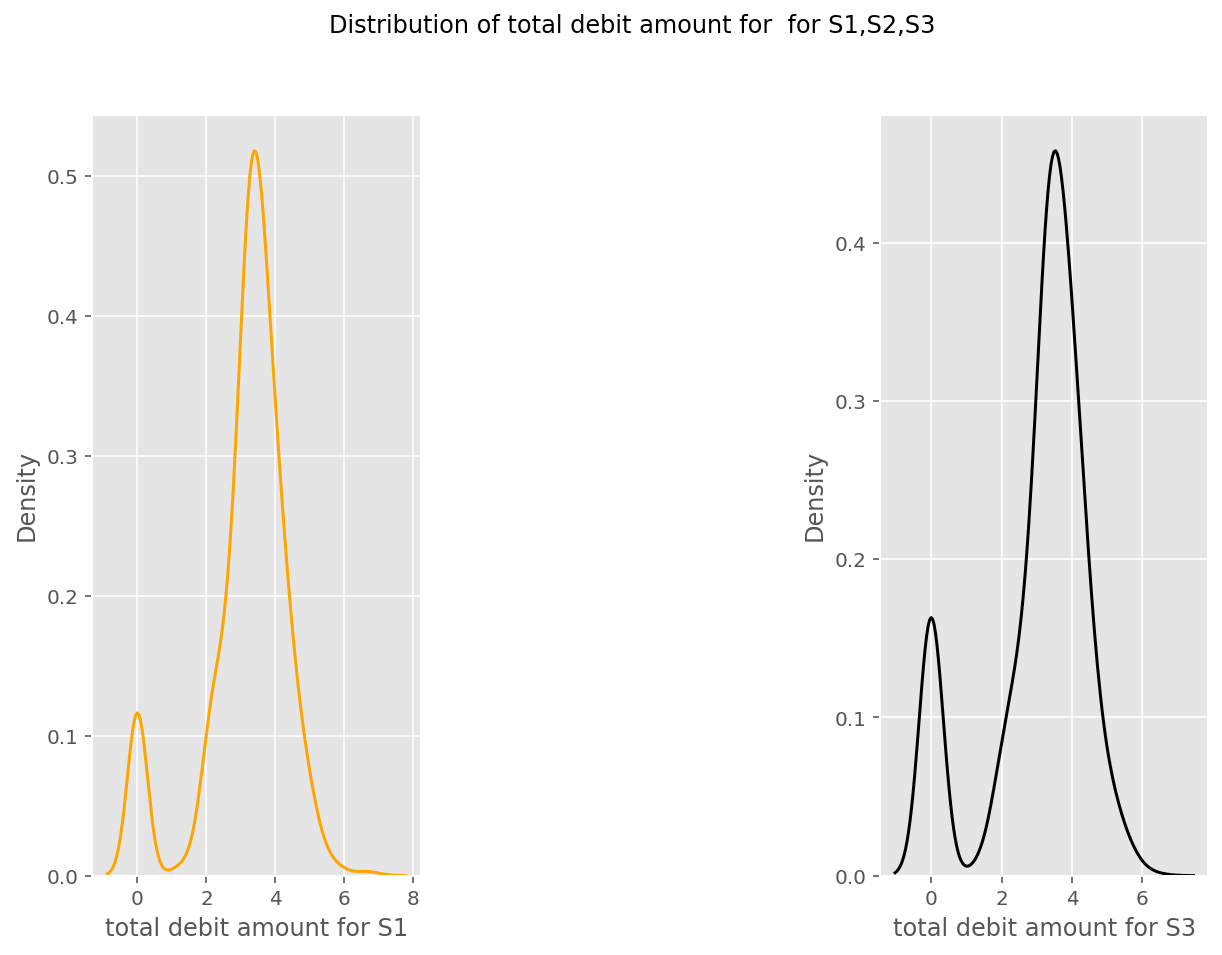

In [153]:
plt.rcParams['figure.figsize']=10,7
plt.subplot(131)
sns.kdeplot(df_transformed['total debit amount for S1'], color='orange')


plt.subplot(133)
sns.kdeplot(df_transformed['total debit amount for S3'], color='black')

plt.suptitle('Distribution of total debit amount for  for S1,S2,S3')
plt.show()

In [154]:
#

In [155]:
# checking for teh negative values
neg_value = []
for col in cols_name:
  ans = (df_transformed[col]  < 0).sum().sum()
  neg_value.append(ans)

In [156]:
neg_value


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [157]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   AGE                                 1249 non-null   float64       
 1   CUS_Month_Income                    1249 non-null   float64       
 2   CUS_Gender                          1249 non-null   object        
 3   CUS_Marital_Status                  1249 non-null   object        
 4   CUS_Customer_Since                  1249 non-null   datetime64[ns]
 5   YEARS_WITH_US                       1249 non-null   float64       
 6   # total debit transactions for S1   1249 non-null   float64       
 7   # total debit transactions for S2   1249 non-null   float64       
 8   # total debit transactions for S3   1249 non-null   float64       
 9   total debit amount for S1           1249 non-null   float64       
 10  total debit amount for S

In [158]:
#Outer fences of the variable All 
def fences(df, variable_name):    
    q1 = df[variable_name].quantile(0.25)
    q3 = df[variable_name].quantile(0.75)
    iqr = q3-q1
    outer_fence = 3*iqr
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    return outer_fence_le, outer_fence_ue

In [159]:
for col in cols_name:
  print(col)
  Z_score(df_transformed,col)
  outer_fence_le, outer_fence_ue = fences(df_transformed,col)
  print('Lower end outer fence: ', outer_fence_le)
  #-10.7030675
  print('Upper end outer fence: ', outer_fence_ue)
  #14.46219500
  print()
  

AGE
Mean of the given series : 3.572731417230348
STD Deviation of given series : 0.32930547276953964
Outlier in the dataset is (Teen agers): [4.918684734458728, 4.918684734458728]
Lower end outer fence:  2.155988389772491
Upper end outer fence:  5.038175514003067

CUS_Month_Income
Mean of the given series : 101.8686334796323
STD Deviation of given series : 71.21761119481451
Outlier in the dataset is (Teen agers): [368.4031498640387, 368.4031498640387, 368.4031498640387, 350.33980603867246, 368.4031498640387, 364.68165148843406, 430.8869380063768]
Lower end outer fence:  -352.3991557540473
Upper end outer fence:  516.6930416193319

YEARS_WITH_US
Mean of the given series : 2.4079428409295396
STD Deviation of given series : 0.15502866010834662
Outlier in the dataset is (Teen agers): [2.924017738212866, 2.924017738212866, 2.924017738212866, 3.036588971875663, 2.924017738212866, 2.8844991406148166, 2.8844991406148166, 2.8844991406148166, 2.8844991406148166, 3.036588971875663, 3.036588971875

In [160]:
df_win = df_transformed.copy(deep=True)

In [161]:
col_name  = []

In [162]:
#Winsorize on right-tail with outliers 
for col in cols_name:
    df_win[col] = winsorize(df_transformed[col], limits=(0, 0.05))


In [163]:
df_win.columns 

Index(['AGE', 'CUS_Month_Income', 'CUS_Gender', 'CUS_Marital_Status',
       'CUS_Customer_Since', 'YEARS_WITH_US',
       '# total debit transactions for S1',
       '# total debit transactions for S2',
       '# total debit transactions for S3', 'total debit amount for S1',
       'total debit amount for S3', '# total credit transactions for S1',
       '# total credit transactions for S3', 'total credit amount for S1',
       'total credit amount for S2', 'total credit amount for S3',
       'total debit amount', 'total debit transactions', 'total credit amount',
       'total credit transactions', 'total transactions', 'CUS_Target',
       'TAR_Desc', 'Status', 'CreditScoreGivenAge'],
      dtype='object')

In [164]:
for col in cols_name:
  print(col)
  Z_score(df_win,col)
  outer_fence_le, outer_fence_ue = fences(df_win,col)
  print('Lower end outer fence: ', outer_fence_le)
  #-10.7030675
  print('Upper end outer fence: ', outer_fence_ue)
  #14.46219500
  print()

AGE
Mean of the given series : 3.565717977460589
STD Deviation of given series : 0.3153389234642666
Outlier in the dataset is (Teen agers): []
Lower end outer fence:  2.155988389772491
Upper end outer fence:  5.038175514003067

CUS_Month_Income
Mean of the given series : 99.54001254540438
STD Deviation of given series : 65.70184843850191
Outlier in the dataset is (Teen agers): []
Lower end outer fence:  -352.3991557540473
Upper end outer fence:  516.6930416193319

YEARS_WITH_US
Mean of the given series : 2.3904487560210357
STD Deviation of given series : 0.1258277632701478
Outlier in the dataset is (Teen agers): []
Lower end outer fence:  2.4101422641752306
Upper end outer fence:  2.4101422641752306

# total debit transactions for S1
Mean of the given series : 2.962776784826612
STD Deviation of given series : 1.59717924208074
Outlier in the dataset is (Teen agers): []
Lower end outer fence:  -4.410452544677615
Upper end outer fence:  10.344109486039063

# total debit transactions for S

This Solves our problem of outliers and now we scale the data to feed to algorithms

# Data Preperation 

In [165]:
#specifing the catagorrical Features and Numeric features 

categorical_data =df_win.select_dtypes(exclude=[np.number])

In [166]:
categorical_data

,CUS_Gender,CUS_Marital_Status,CUS_Customer_Since,TAR_Desc
0,MALE,MARRIED,1994-06-30,EXECUTIVE
1,FEMALE,SINGLE,2005-05-19,LOW
2,FEMALE,SINGLE,2005-05-20,MIDLE
3,FEMALE,SINGLE,2005-05-20,LOW
4,FEMALE,SINGLE,2014-06-30,LOW
...,...,...,...,...
1244,MALE,SINGLE,2005-07-25,LOW
1245,MALE,SINGLE,2005-07-27,MIDLE
1246,MALE,SINGLE,2005-07-25,MIDLE
1247,MALE,SINGLE,2005-07-26,MIDLE


In [167]:
cols = categorical_data.columns

In [168]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for col in cols:
  df_win[col] = LE.fit_transform(df[col])

In [169]:
## creating the copy 
df_scaled =df_win.copy()

In [170]:
  X = df_scaled.drop('Status', axis = 1 )
  y =df_scaled['Status']

In [171]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

rob_scaler = RobustScaler()

X_scaled = rob_scaler.fit_transform(X.values)

In [172]:
features=df_scaled.drop('Status', axis = 1 )
labele=df_scaled['Status']

In [173]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labele, test_size=0.33,random_state=42 )

In [174]:
# Models for Classification
models = [('LR', LogisticRegression(random_state=123456)),
          ('CART', DecisionTreeClassifier(random_state=123456)),
          ('RF', RandomForestClassifier(random_state=123456)),
          ('SVR', SVC(gamma='auto',random_state=123456)),
          ('GB', GradientBoostingClassifier(random_state = 12345))]
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model,features, labele, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.861477 (0.019040)
CART: 0.783039 (0.037531)
RF: 0.857484 (0.021117)
SVR: 0.819877 (0.033889)
GB: 0.842277 (0.015576)


### I can see that Random forest and Gradient Boosting are performing the best out of the other algorithms 
### hence we will tune the model to the best accurecy
I have Choosen Ensemble tecniques inorder to demonstrait the importance of hyperparameter tuning

In [175]:
# GB Confusion Matrix
model_GB = GradientBoostingClassifier(random_state=12345)
model_GB.fit(X_train, y_train)
y_pred = model_GB.predict(X_test)
conf_mat = confusion_matrix(y_pred,y_test)
conf_mat

array([[ 42,  27],
       [ 36, 308]])

In [176]:
# Classification Report for XGB Model
print(classification_report(model_GB.predict(X_test),y_test))

              precision    recall  f1-score   support

         0.0       0.54      0.61      0.57        69
         1.0       0.92      0.90      0.91       344

    accuracy                           0.85       413
   macro avg       0.73      0.75      0.74       413
weighted avg       0.86      0.85      0.85       413



In [177]:
# GB Confusion Matrix
model_RF = RandomForestClassifier()
model_RF.fit(X_train, y_train)
y_pred = model_RF.predict(X_test)
conf_mat = confusion_matrix(y_pred,y_test)
conf_mat

array([[ 44,  20],
       [ 34, 315]])

In [178]:
# Classification Report for Rf Model
print(classification_report(model_RF.predict(X_test),y_test))

              precision    recall  f1-score   support

         0.0       0.56      0.69      0.62        64
         1.0       0.94      0.90      0.92       349

    accuracy                           0.87       413
   macro avg       0.75      0.80      0.77       413
weighted avg       0.88      0.87      0.87       413



In [179]:
# Auc Roc Curve
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

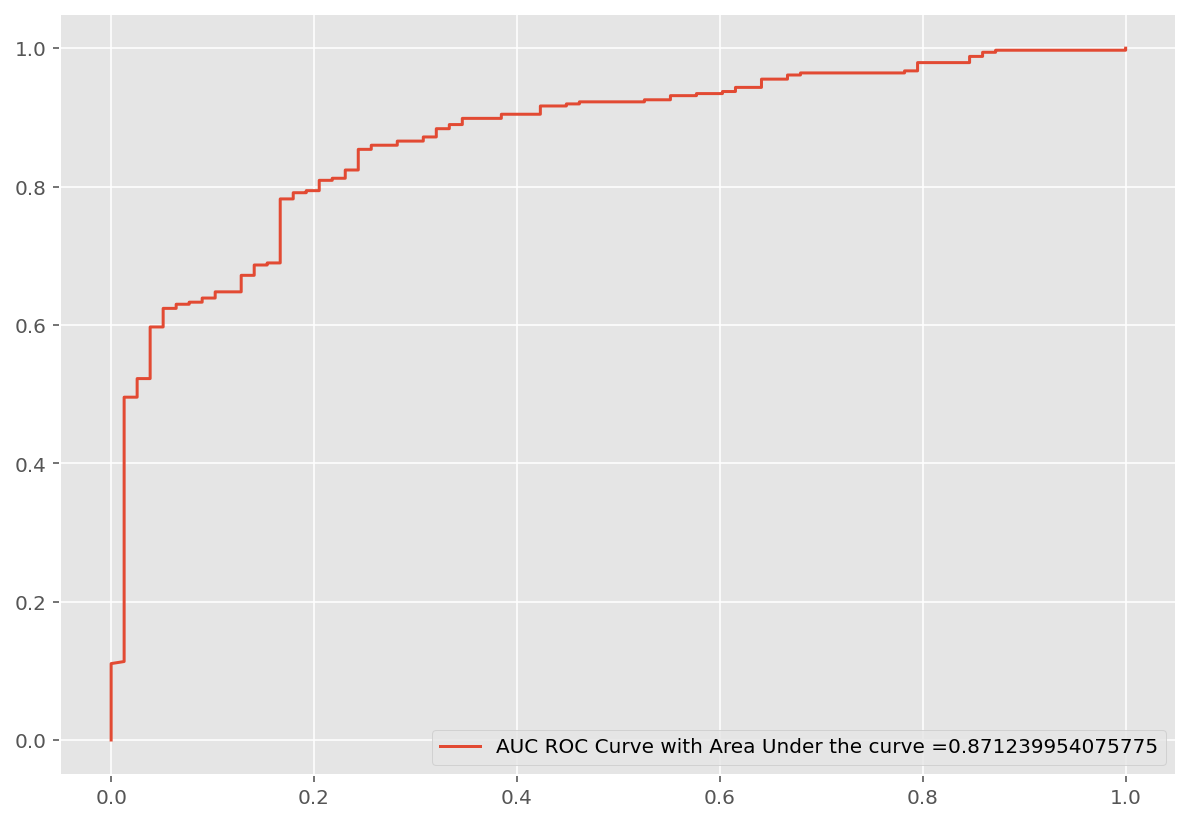

In [180]:
generate_auc_roc_curve(model_GB, X_test)

But here the matric of interest is Precision and recall hence 

In [181]:
from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve
y_pred_proba = model_GB.predict_proba(X_test)[:, 1]
average_precision = average_precision_score(y_test,y_pred_proba)

print('Average precision-recall score RF: {}'.format(average_precision))

Average precision-recall score RF: 0.964985804998119


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.96')

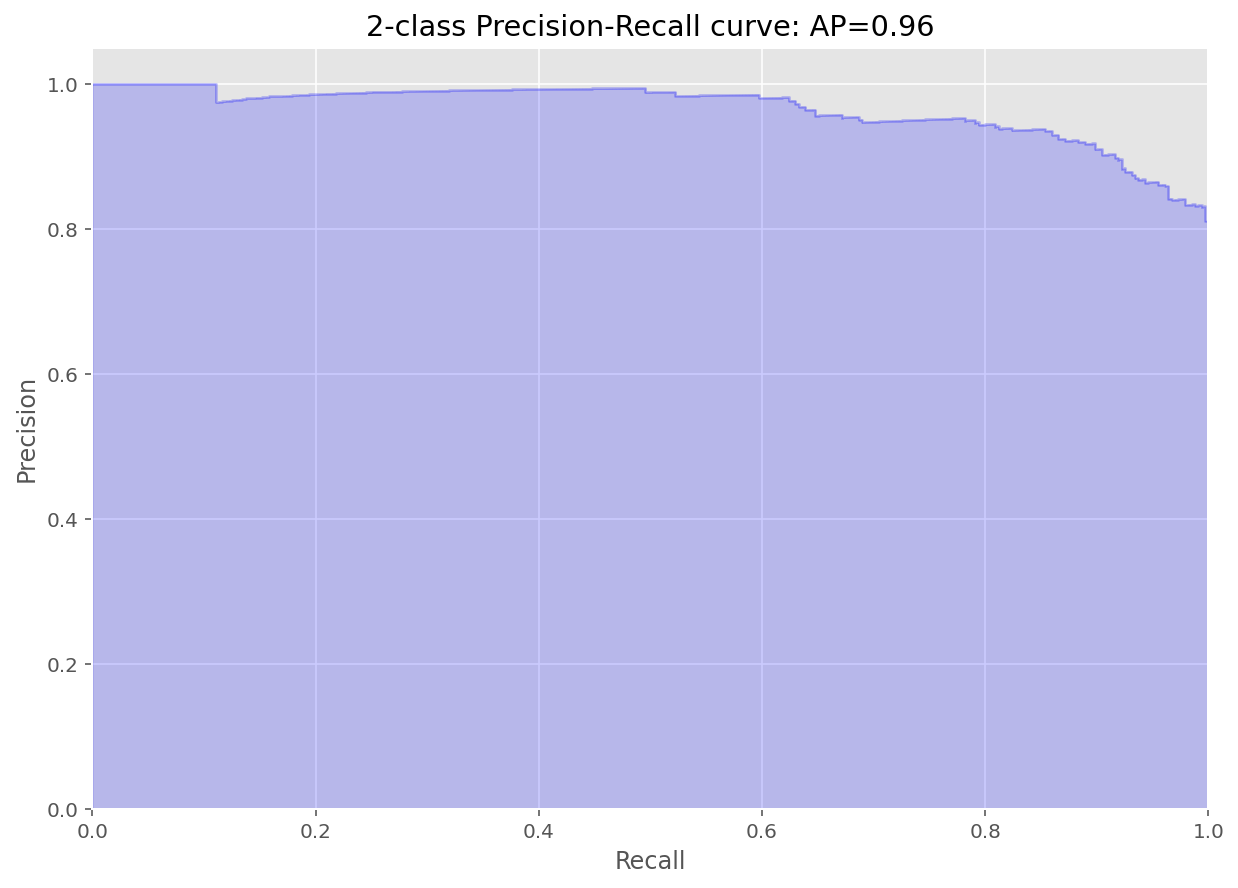

In [182]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

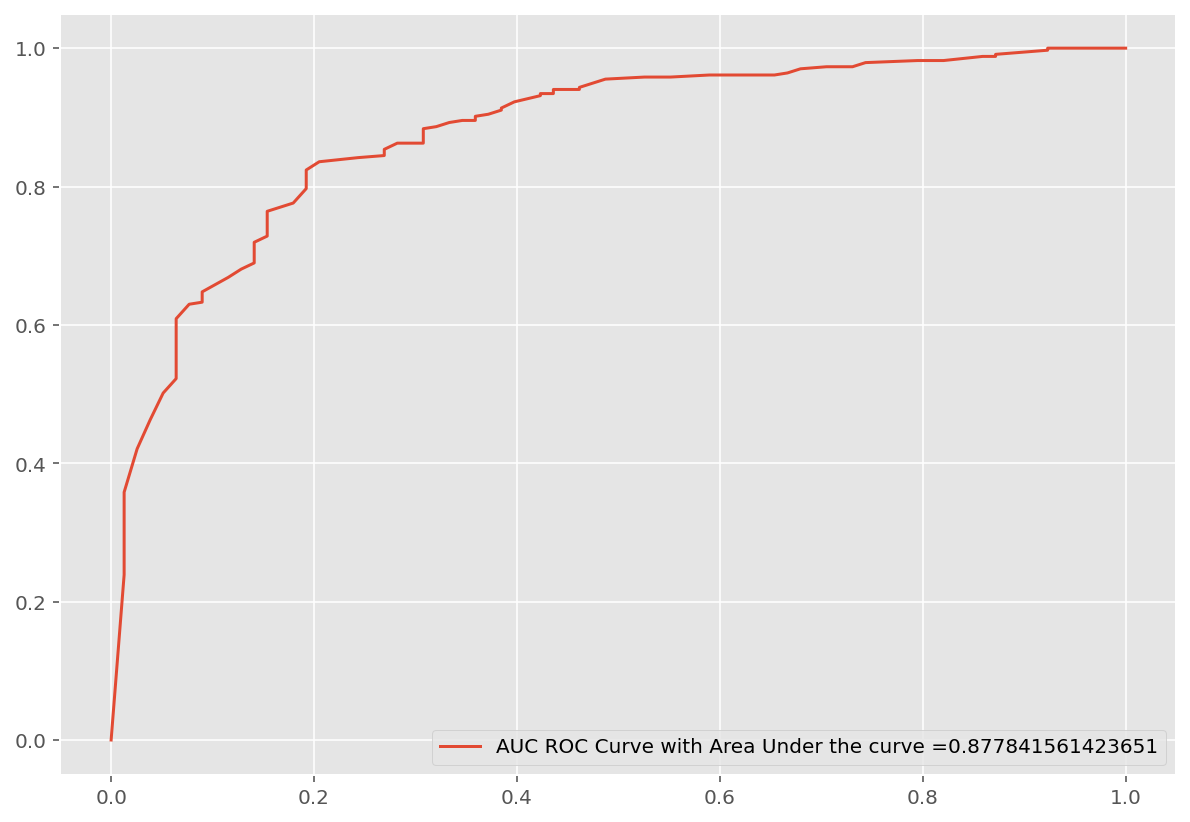

In [183]:
generate_auc_roc_curve(model_RF, X_test)

In [184]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5,6],
    'min_samples_split': [8, 10, 12,14],
    'n_estimators': [100, 200, 300, 500]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [185]:
# Fit the grid search to the data
#grid_search.fit(features,labele)
#grid_search.best_params_

In [186]:
rf_params ={'bootstrap': True,
 'max_depth': 110,
 'max_features': 2,
 'min_samples_leaf': 4,
 'min_samples_split': 8,
 'n_estimators': 300}

In [187]:
rf_Tuned = RandomForestClassifier(**rf_params,random_state=100)
rf = rf_Tuned.fit(X_train, y_train)

In [188]:

y_pred = rf.predict(X_test)
conf_mat = confusion_matrix(y_pred,y_test)
conf_mat

array([[ 42,  22],
       [ 36, 313]])

In [189]:
print(classification_report(rf_Tuned.predict(X_test),y_test))

              precision    recall  f1-score   support

         0.0       0.54      0.66      0.59        64
         1.0       0.93      0.90      0.92       349

    accuracy                           0.86       413
   macro avg       0.74      0.78      0.75       413
weighted avg       0.87      0.86      0.87       413



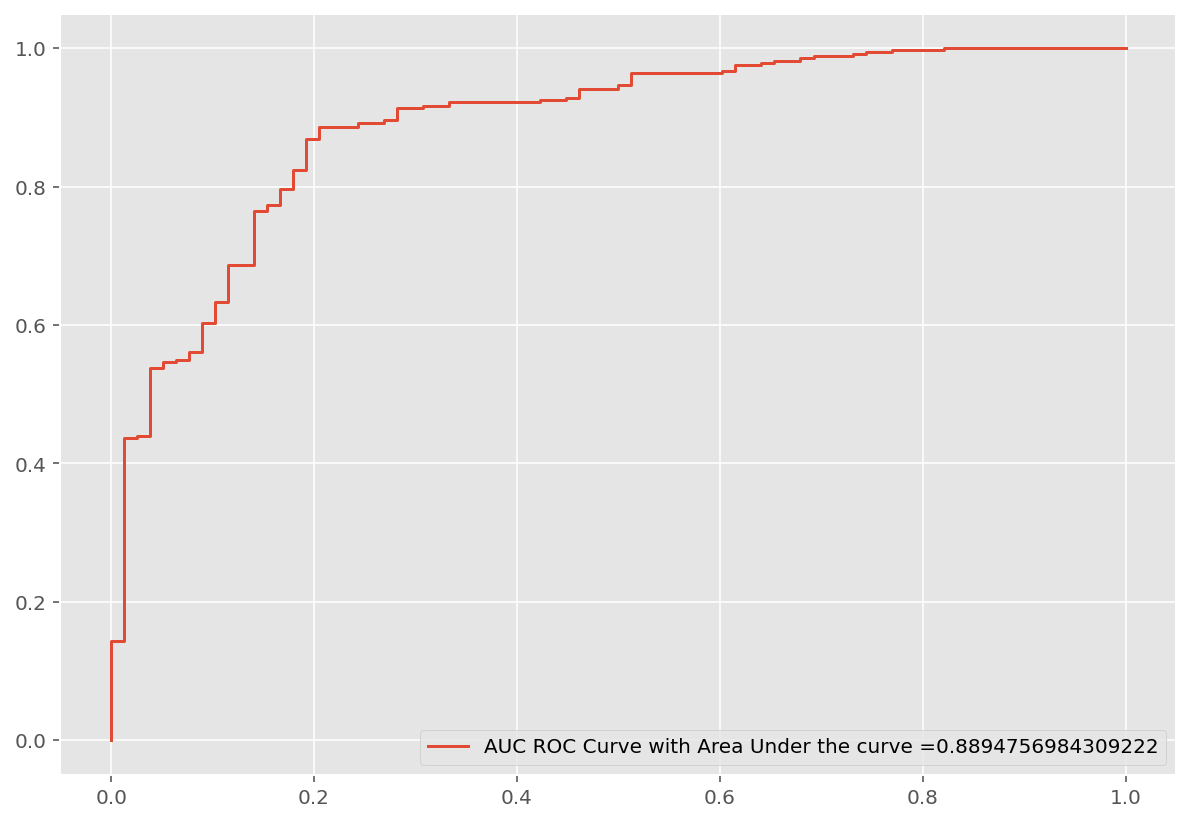

In [190]:
generate_auc_roc_curve(rf_Tuned, X_test)

In [191]:
y_pred_proba_rf_tuned = rf_Tuned.predict_proba(X_test)[:, 1]
average_precision = average_precision_score(y_test,y_pred_proba_rf_tuned)

print('Average precision-recall score RF: {}'.format(average_precision))

Average precision-recall score RF: 0.9683924510389451


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.97')

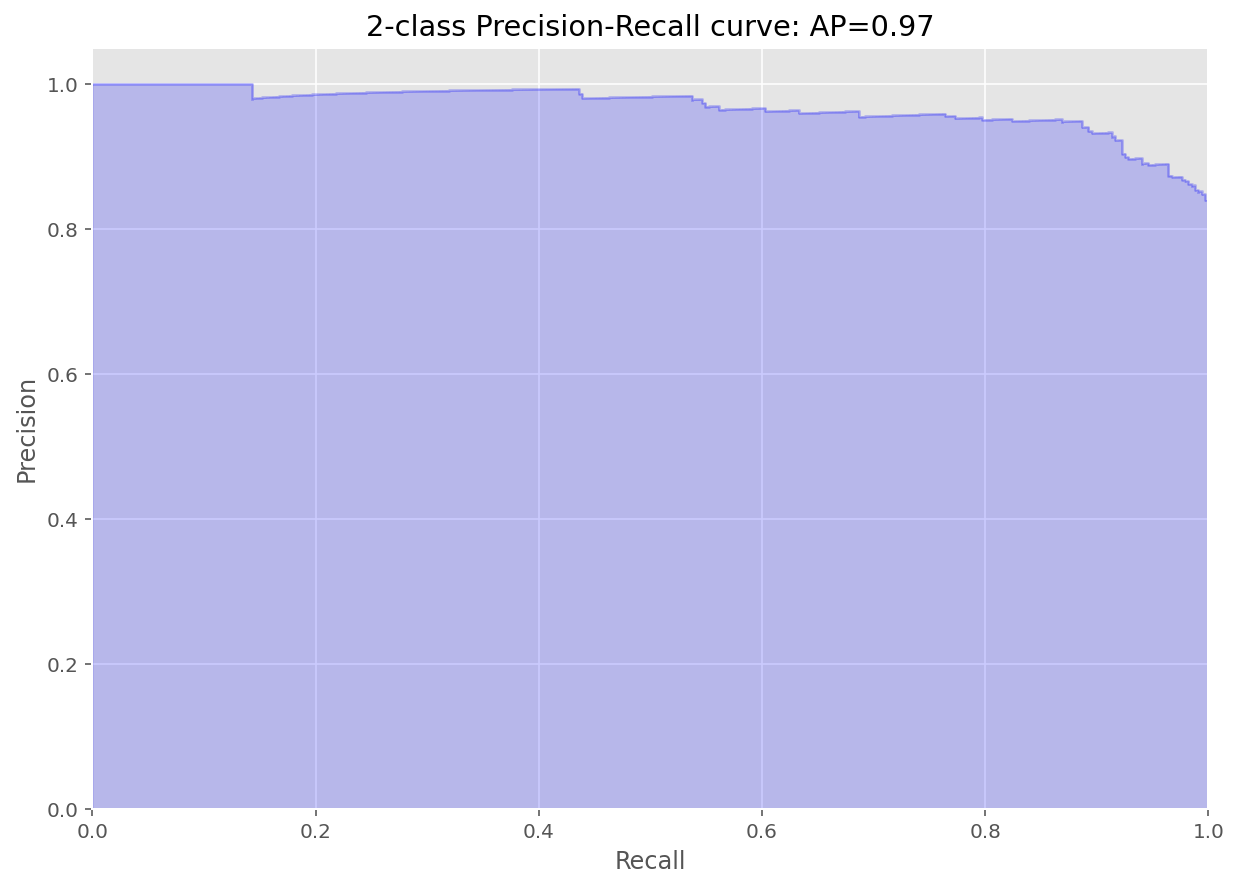

In [192]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_rf_tuned)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

In [193]:
## for Gradient boosting 
# Create a based model
# Model Tuning
gb_params = {
            'learning_rate': [0.01,0.05,0.1,0.2],
             'max_depth': [3,4,5],
             'n_estimators': [200,300,500], 
             'subsample': [1,2,3]
             }
rf = GradientBoostingClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = model_GB, param_grid = gb_params, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [194]:
# Fit the grid search to the data
grid_search.fit(features,labele)
grid_search.best_params_

Fitting 3 folds for each of 108 candidates, totalling 324 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
216 fits failed out of a total of 324.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
108 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py", line 525, in fit
    self._check_params()
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py", line 317, in _check_params
    raise ValueError("subsample must be in (0,1] but was %r" % self.subsample)
ValueError: subsample

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1}

In [195]:
gb_params = {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1}
Gb_Tuned = GradientBoostingClassifier(**gb_params,random_state=100).fit(X_train, y_train)

In [196]:
print(classification_report(Gb_Tuned.predict(X_test),y_test))

              precision    recall  f1-score   support

         0.0       0.55      0.62      0.59        69
         1.0       0.92      0.90      0.91       344

    accuracy                           0.85       413
   macro avg       0.74      0.76      0.75       413
weighted avg       0.86      0.85      0.86       413



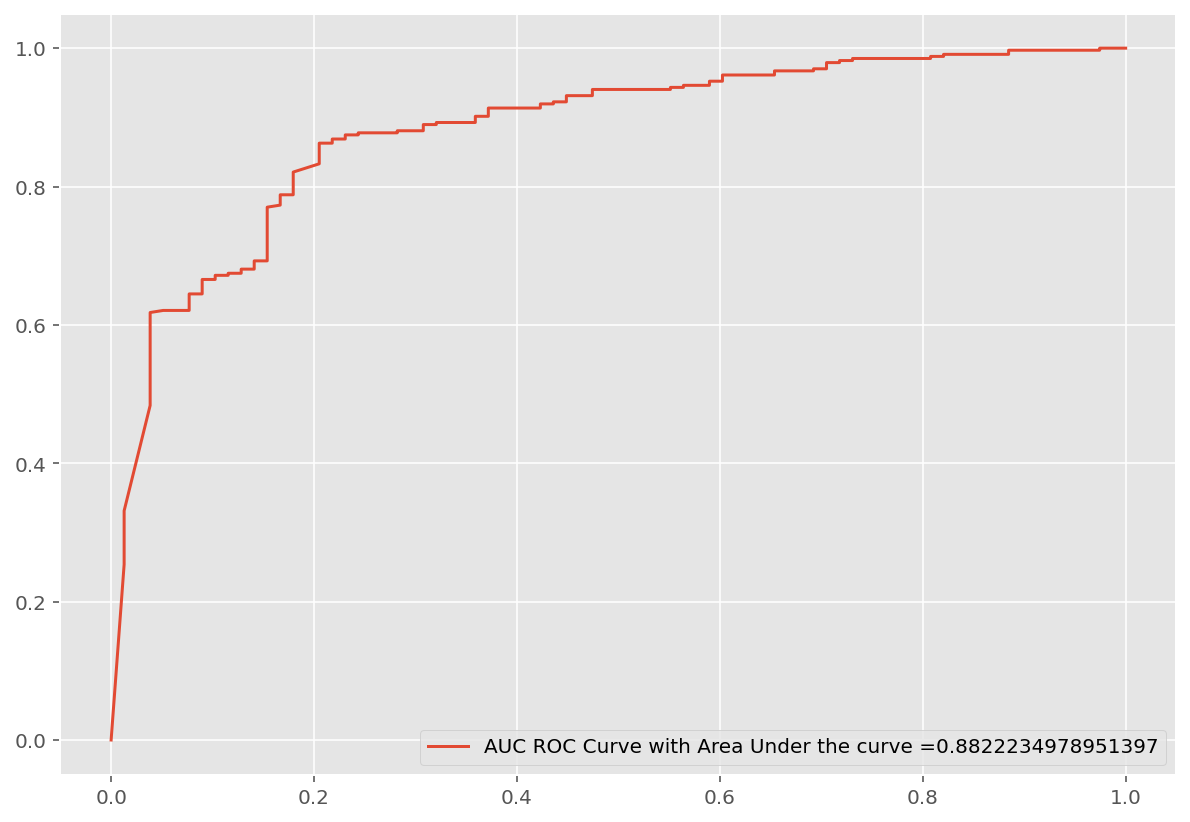

In [197]:
generate_auc_roc_curve(Gb_Tuned, X_test)

In [198]:
y_pred_proba_Gb_tuned = Gb_Tuned.predict_proba(X_test)[:, 1]
average_precision = average_precision_score(y_test,y_pred_proba_Gb_tuned)

print('Average precision-recall score RF: {}'.format(average_precision))

Average precision-recall score RF: 0.9655335425262895


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.97')

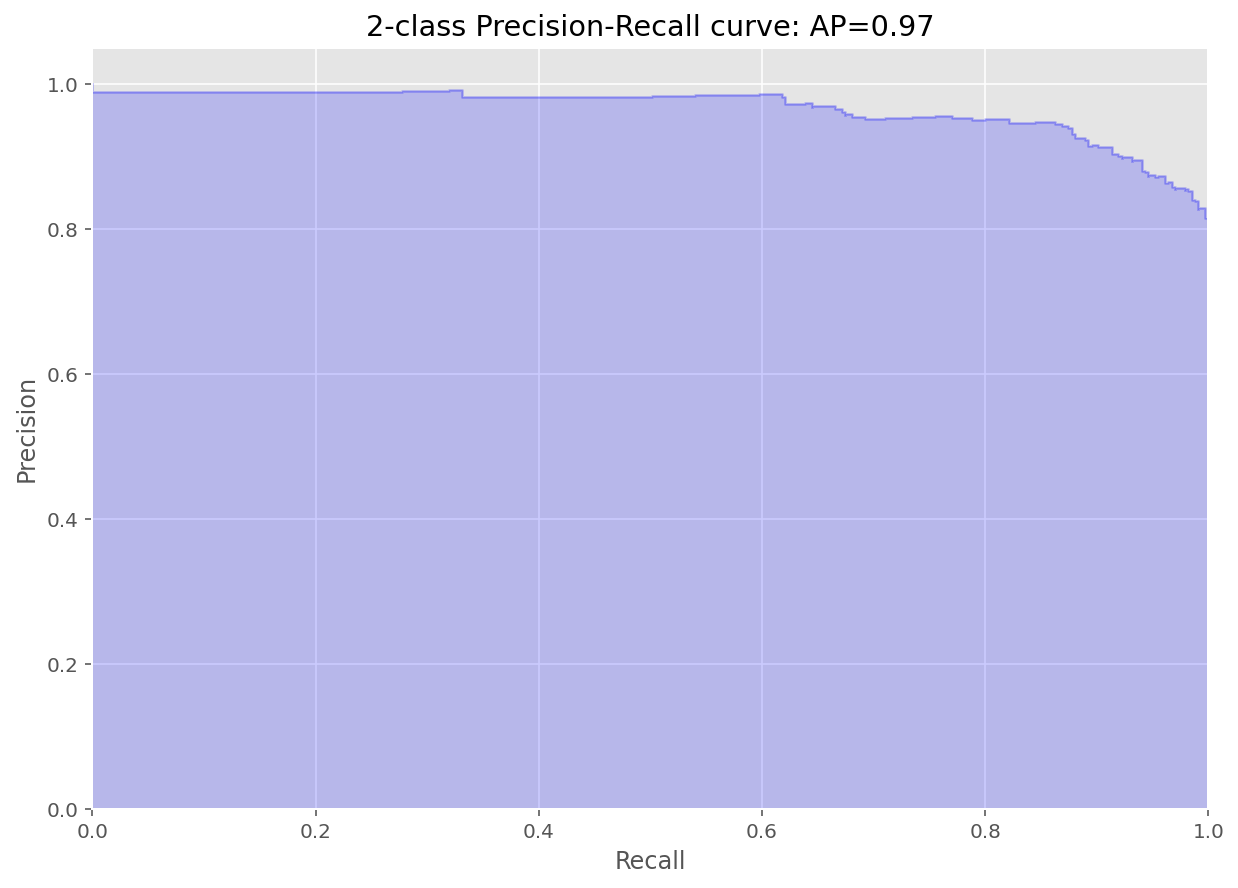

In [199]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_Gb_tuned)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

In [200]:
# evaluate each model in turn
models = [("Rf", rf_Tuned),
          ("GB",Gb_Tuned)]


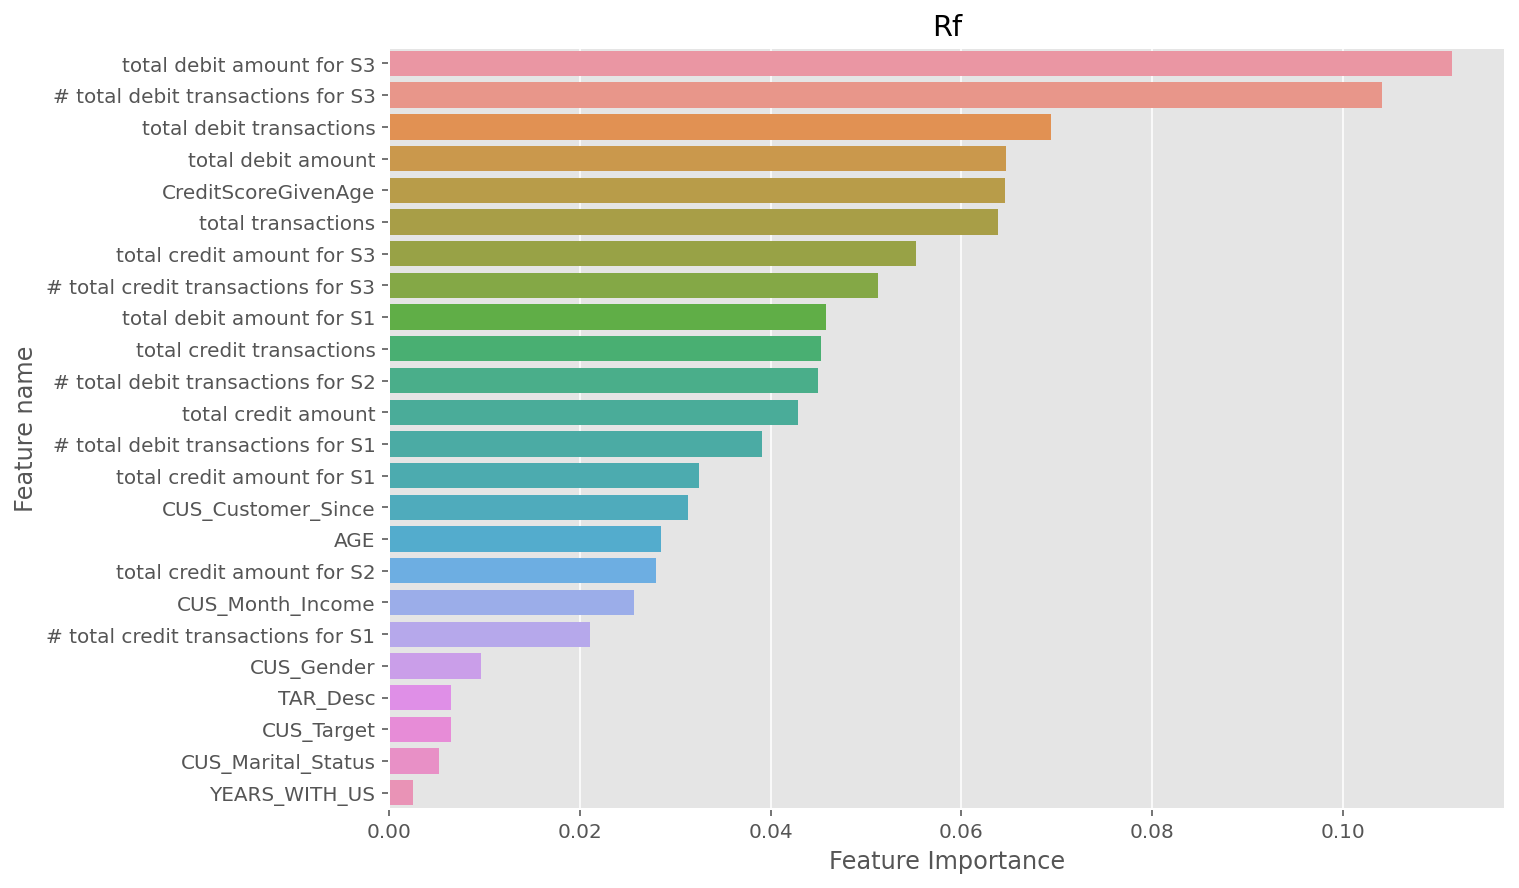

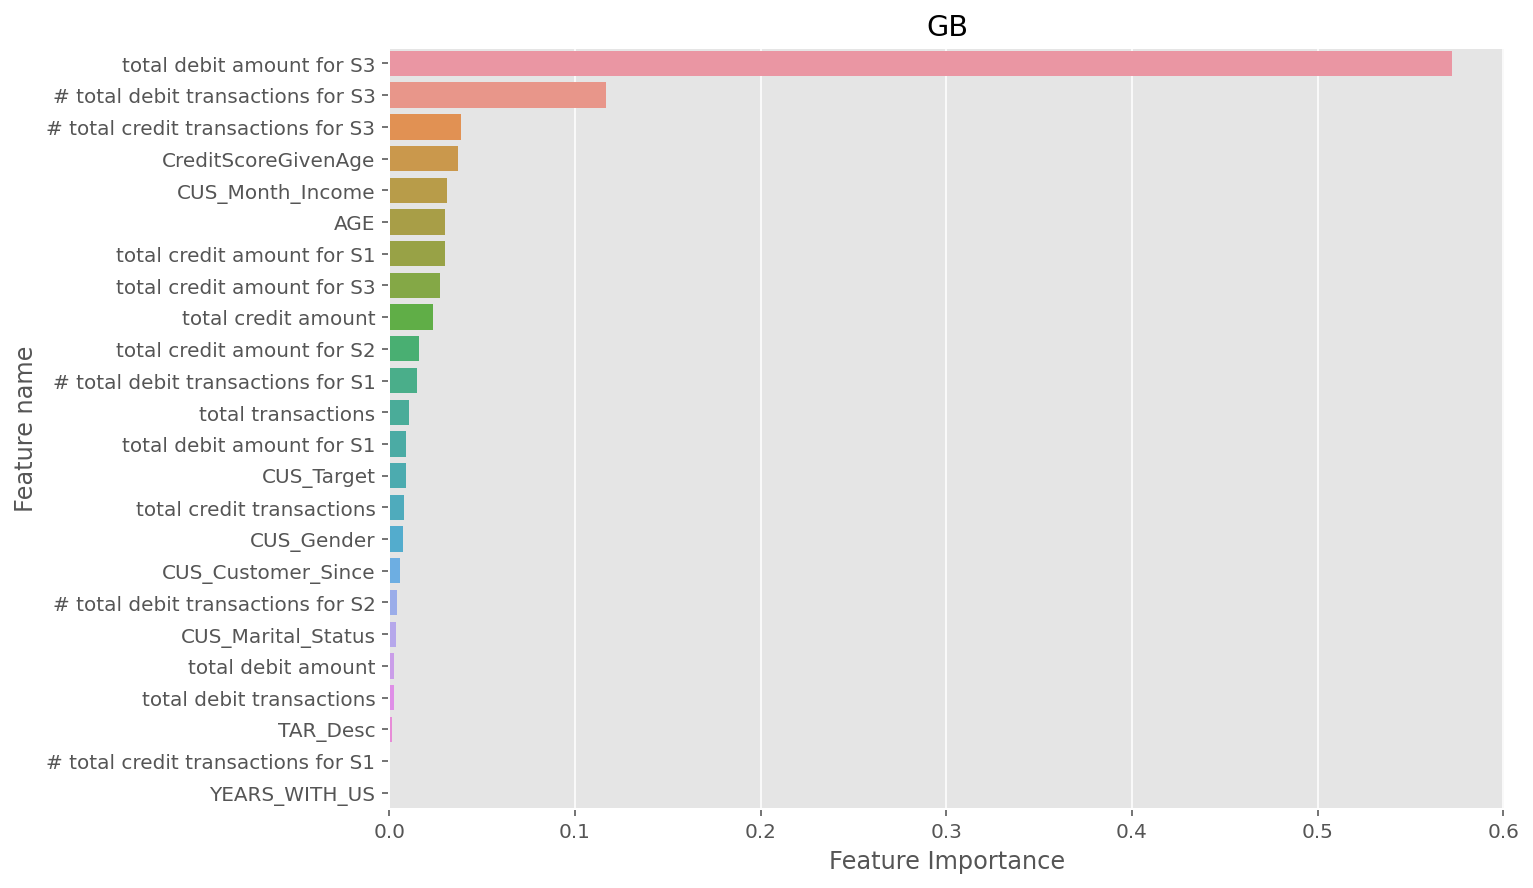

In [201]:
for name, model in models:
        base = model.fit(X_train,y_train)
        y_pred = base.predict(X_test)
        acc_score = accuracy_score(y_test, y_pred)
        feature_imp = pd.Series(base.feature_importances_,
                        index=features.columns).sort_values(ascending=False)

        sns.barplot(x=feature_imp, y=feature_imp.index)
        plt.xlabel('Feature Importance')
        plt.ylabel('Feature name')
        plt.title(name)
        plt.show()